In [1]:
%matplotlib inline

%run -i ../libs/import_libs.py

In [2]:
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.chrome.options import Options 
import matplotlib

In [21]:
from selenium.webdriver.chrome.options import Options

options = Options()
options.headless = True
path = '/home/tarik/misc/chromedriver'
driver = webdriver.Chrome("./chromedriver",options=options)

driver.get("http://covidly.com/summary")

In [22]:
# https://github.com/CSSEGISandData/COVID-19
mapper_dict = {'Bosnia and Herz.': 'Bosnia and Herzegovina',
 ' Czechia': 'Czech Republic',
 'Dominican Rep.': 'Dominican Republic',
 'Faroe Is.': 'Faroe Islands',
 'blah': 'French Guiana',
#  'China': 'Mainland China',
 'blah3': 'Martinique',
 'blah2': 'Others',
 'St. Barthélemy': 'Saint Barthelemy',
#  'United Kingdom': 'UK',
 'United States': 'US',
 'UAE': 'United Arab Emirates',
 'Vatican': 'Vatican City'}

# oecd_list = ['Luxembourg', 'Ireland', 'Switzerland', 'Norway', 'US',
#        'Iceland', 'Netherlands', 'Austria', 'Denmark', 'Australia',
#        'Germany', 'Sweden', 'Belgium', 'Finland', 'Canada',
#        'UK', 'France', 'Japan', 'Italy', 'New Zealand',
#        'South Korea', 'Spain', 'Israel', 'Czech Republic',
#        'Slovenia', 'Estonia', 'Slovakia', 'Portugal', 'Poland', 'Hungary',
#        'Greece', 'Turkey', 'Chile', 'Mexico']
oecd_list = ['Luxembourg', 'Ireland', 'Switzerland', 'Norway', 'US',
       'Iceland', 'Netherlands', 'Austria', 'Denmark', 'Australia',
       'Germany', 'Sweden', 'Belgium', 'Finland', 'Canada',
       'United Kingdom', 'France', 'Japan', 'Italy', 'New Zealand',
       'South Korea', 'Spain', 'Israel',
       'Slovenia', 'Estonia', 'Slovakia', 'Portugal', 'Poland', 'Hungary',
       'Greece', 'Chile', 'Mexico']

mapper_jhu = {
# 'Channel Islands',
#  'Czech Republic',
#  'French Guiana',
#  'Holy See',
 'Hong Kong SAR': 'Hong Kong',
 'Iran (Islamic Republic of)': 'Iran',
 'Macao SAR': 'Macau',
#  'Martinique',
#  'Others',
 'Korea, South': 'South Korea',
 'Republic of Moldova': 'Moldova',
 'Russian Federation': 'Russia',
#  'Saint Martin',
#  'Taipei and environs',
 'Viet Nam': 'Vietnam',
 'occupied Palestinian territory': 'Palestine'}


In [23]:
df = pd.read_csv("https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv")
df = df.drop(["Lat", "Long"], axis=1).copy()

for c in mapper_jhu:
    df.loc[df["Country/Region"] == c, "Country/Region"] = mapper_jhu[c]
df.head()

Province/State Country/Region  1/22/20  1/23/20  1/24/20  1/25/20  1/26/20  1/27/20  1/28/20  1/29/20  1/30/20  1/31/20  2/1/20  2/2/20  2/3/20  2/4/20  2/5/20  2/6/20  2/7/20  2/8/20  2/9/20  2/10/20  2/11/20  2/12/20  2/13/20  2/14/20  2/15/20  2/16/20  2/17/20  2/18/20  2/19/20  2/20/20  2/21/20  2/22/20  2/23/20  2/24/20  2/25/20  2/26/20  2/27/20  2/28/20  2/29/20  3/1/20  3/2/20  3/3/20  3/4/20  3/5/20  3/6/20  3/7/20  3/8/20  3/9/20  3/10/20  3/11/20  3/12/20  3/13/20  3/14/20  3/15/20  3/16/20  3/17/20  3/18/20  3/19/20  3/20/20  3/21/20  3/22/20  3/23/20  3/24/20  3/25/20  3/26/20  3/27/20  3/28/20  3/29/20  3/30/20  3/31/20  4/1/20  4/2/20  4/3/20  4/4/20  4/5/20  4/6/20  4/7/20  4/8/20  4/9/20
0            NaN    Afghanistan        0        0        0        0        0        0        0        0        0        0       0       0       0       0       0       0       0       0       0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        1        1        1        1        1        1       1       1       1       1       1       1       1       4       4        5        7        7        7       11       16       21       22       22       22       24       24       40       40       74       84       94      110      110      120      170      174     237     273     281     299     349     367     423     444     484
1            NaN        Albania        0        0        0        0        0        0        0        0        0        0       0       0       0       0       0       0       0       0       0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0       0       0       0       0       0       0       0       0       2       10       12       23       33       38       42       51       55       59       64       70       76       89      104      123      146      174      186      197      212      223      243     259     277     304     333     361     377     383     400     409
2            NaN        Algeria        0        0        0        0        0        0        0        0        0        0       0       0       0       0       0       0       0       0       0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        1        1        1        1        1       1       3       5      12      12      17      17      19      20       20       20       24       26       37       48       54       60       74       87       90      139      201      230      264      302      367      409      454      511      584      716     847     986    1171    1251    1320    1423    1468    1572    1666
3            NaN        Andorra        0        0        0        0        0        0        0        0        0        0       0       0       0       0       0       0       0       0       0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0       0       1       1       1       1       1       1       1       1        1        1        1        1        1        1        2       39       39       53       75       88      113      133      164      188      224      267      308      334      370      376     390     428     439     466     501     525     545     564     583
4            NaN         Angola        0        0        0        0        0        0        0        0        0        0       0       0       0       0       0       0       0       0       0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0       0       0       0       0       0       0 

In [24]:
dfs = pd.read_html(driver.page_source)[0].rename(columns={'Cases  Total': "latest_count", 
    'Cases / 1M  (#)': 'case_per_mil'})

dfs["Country"] = [mapper_dict[c] if c in mapper_dict.keys() else c for c in dfs.Country]
dfs.head()

Country  HealthScore  latest_count Cases  24 Hrs  Cases  Per 1M  Deaths  Total Deaths  24 Hrs  Recovered  Total Recovered  24 Hrs  Active  Total Active  24 Hrs  Tests  Total  Tests  Per 1M  Unnamed: 13
0       US          3.0        465906       +32,203         1414.0        16590.0         +1,813           25576.0            +2,000         423740        +28,390     2353096.0         7141.0          NaN
1    Spain          6.0        153222        +5,002         3253.0        15447.0           +655           52165.0            +4,144          85610           +203      355000.0         7537.0          NaN
2    Italy          7.0        143626        +4,204         2384.0        18279.0           +610           28470.0            +1,979          96877         +1,615      853369.0        14165.0          NaN
3  Germany          5.0        118235        +4,939         1422.0         2607.0           +258           46211.0            +6,107          69417          -1426     1317887.0        15850.0          NaN
4   France          4.0        117065        +7,997         1745.0        12210.0         +1,341           22385.0            +1,301          82470         +5,355      333807.0         4977.0          NaN

In [26]:
df2 = df[~df["Province/State"].isin(["Diamond Pricess", "Grand Princess"])].rename(columns={"Country/Region": "Country"})
country_df0 = df2.groupby("Country").sum()
country_df = pd.merge(country_df0, dfs[["Country", "latest_count"]], left_index=True, right_on='Country').set_index('Country')


td = (datetime.datetime.today() - datetime.timedelta(days=0)).strftime('%-m/%-d/%y')
country_df[td] = country_df[["latest_count", td]].max(axis=1)
country_df = country_df.drop(['latest_count'], axis=1).transpose()

country_df["OECD"] = country_df[oecd_list].sum(axis=1)
country_df.tail()

Country  Afghanistan  Albania  Algeria  Andorra  Angola  Argentina  Armenia  Australia  Austria  Azerbaijan  Bahamas  Bahrain  Bangladesh  Barbados  Belarus  Belgium  Belize  Benin  Bhutan  Bolivia  Bosnia and Herzegovina  Botswana  Brazil  Brunei  Bulgaria  Burkina Faso  Burundi  Cabo Verde  Cambodia  Cameroon  Canada  Chad  Chile  China  Colombia  Costa Rica  Croatia  Cuba  Cyprus  Czechia  Denmark  Diamond Princess  Djibouti  Dominica  Dominican Republic  Ecuador  Egypt  El Salvador  Eritrea  Estonia  Eswatini  Ethiopia  Fiji  Finland  France  Gabon  Gambia  Georgia  Germany  Ghana  Greece  Grenada  Guatemala  Guinea  Guinea-Bissau  Guyana  Haiti  Honduras  Hungary  Iceland  India  Indonesia   Iran  Iraq  Ireland  Israel   Italy  Jamaica  Japan  Jordan  Kazakhstan  Kenya  Kosovo  Kuwait  Kyrgyzstan  Laos  Latvia  Lebanon  Liberia  Libya  Liechtenstein  Lithuania  Luxembourg  MS Zaandam  Madagascar  Malawi  Malaysia  Maldives  Mali  Malta  Mauritania  Mauritius  Mexico  Moldova  Monaco  Mongolia  Montenegro  Morocco  Mozambique  Namibia  Nepal  Netherlands  New Zealand  Nicaragua  Niger  Nigeria  North Macedonia  Norway  Oman  Pakistan  Panama  Papua New Guinea  Paraguay  Peru  Philippines  Poland  Portugal  Qatar  Romania  Russia  Rwanda  Saint Lucia  San Marino  Sao Tome and Principe  Saudi Arabia  Senegal  Serbia  Seychelles  Sierra Leone  Singapore  Slovakia  Slovenia  Somalia  South Africa  South Korea   Spain  Sri Lanka  Sudan  Suriname  Sweden  Switzerland  Syria  Tanzania  Thailand  Timor-Leste  Togo  Trinidad and Tobago  Tunisia  Turkey      US  Uganda  Ukraine  United Arab Emirates  United Kingdom  Uruguay  Uzbekistan  Venezuela  Vietnam  Zambia  Zimbabwe     OECD
4/5/20           349      361     1320      501      14       1451      822       5687    12051         584       28      700          88        56      562    19691       5     22       5      157                     654         6   11130     135       531           345        3           7       114       650   15743     9   4471  82602      1485         454     1182   320     446     4587     4561               712        59        14                1745     3646   1173           62       29     1097         9        43    12     1927   93773     21       4      174   100123    214    1735       12         61     121             18      24     21       268      733     1486   3588       2273  58226   961     4994    8430  128948       58   3139     345         584    142     145     556         147    11     533      527       13     18             77        811        2804           9          72       4      3662        19    45    227           6        227    1890      864      73        14         214     1021          10       16      9        17953         1039          6    184      232              555    5687   298      3157    1801                 1       104  2281         3246    4102     11278   1604     3864    5389     104           14         266                      0          2402      222    1908          10             6       1309       485       997        7          1655        10237  131646        176     12        10    6830        21100     19        22      2169            1    44                  104      574   27069  337072      52     1308                  1799           48436      400         342        159      241      39         9  1010145
4/6/20           367      377     1423      525      16       1554      833       5797    12297         641       29      756         123        60      700    20814       7     26       5      183                     674         6   12161     135       549           364        3           7       114       658   16550     9   4815  82665      1579         467     1222   350     465     4822     4875               712        90        15                1828     3747   1322           69       31     1108        10        44    14     2176   98963     24       4      188   103374    21

Country  US  Italy  Iran  Germany  United Kingdom  Switzerland  Australia  Turkey  Pakistan  Bangladesh    cur_date
1/22/20   1      0     0        0               0            0          0       0         0           0  2020-01-22
1/23/20   1      0     0        0               0            0          0       0         0           0  2020-01-23
1/24/20   2      0     0        0               0            0          0       0         0           0  2020-01-24
1/25/20   2      0     0        0               0            0          0       0         0           0  2020-01-25
1/26/20   5      0     0        0               0            0          4       0         0           0  2020-01-26

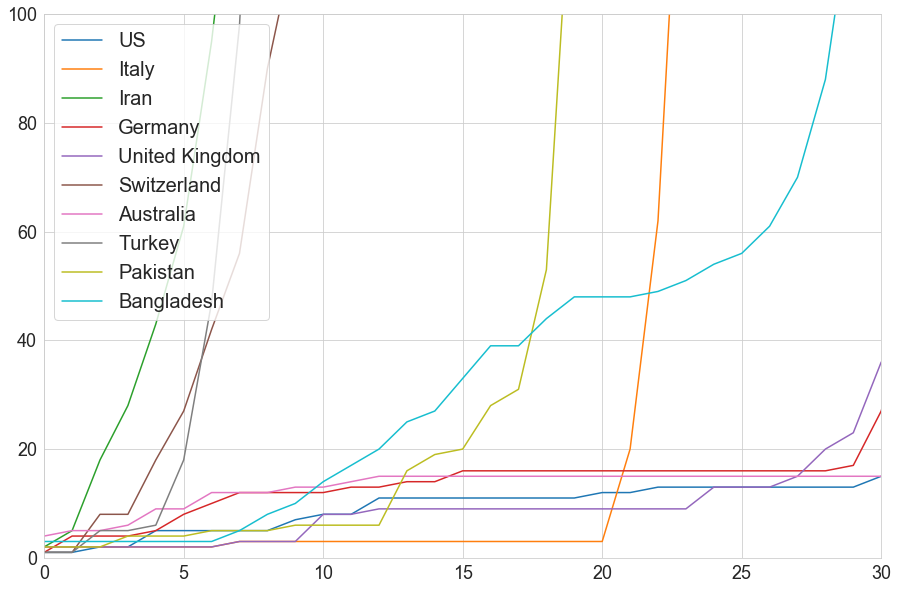

In [1693]:
arr = ["US", "Italy", "Iran", "Germany", 'United Kingdom', "Switzerland", 
                       "Australia",  "Turkey", "Pakistan", "Bangladesh"]
tmp_df = country_df[arr].copy()
tmp_df["cur_date"] = [datetime.date(2020, int(d.split("/")[0]), int(d.split("/")[1])) for d in tmp_df.index]

for c in arr:
    tmp_df2 = tmp_df[tmp_df[c] > 0].copy()
    tmp_df2["day_no"] = range(len(tmp_df2))
    
    plt.plot(tmp_df2.day_no, tmp_df2[c], label=c)

plt.legend(loc=2)
plt.xlim(0, 30)
plt.ylim(0,100)
tmp_df.head()


In [27]:
country_df[["China", "OECD", "Bangladesh", "Philippines"]].tail()

Country  China     OECD  Bangladesh  Philippines
4/5/20   82602  1010145          88         3246
4/6/20   82665  1068648         123         3660
4/7/20   82718  1134523         164         3764
4/8/20   82809  1201850         218         3870
4/9/20   82883  1273383         330         4076

In [9]:
country_df[["China", "OECD", "US", "Italy", "Iran", "Germany", 'United Kingdom', "France", 
                       "Spain",  "South Korea", "Singapore", "Turkey"]].head()

Country  China  OECD  US  Italy  Iran  Germany  United Kingdom  France  Spain  South Korea  Singapore  Turkey
1/22/20    548     4   1      0     0        0               0       0      0            1          0       0
1/23/20    643     4   1      0     0        0               0       0      0            1          1       0
1/24/20    920     8   2      0     0        0               0       2      0            2          3       0
1/25/20   1406     9   2      0     0        0               0       3      0            2          3       0
1/26/20   2075    20   5      0     0        0               0       3      0            3          4       0

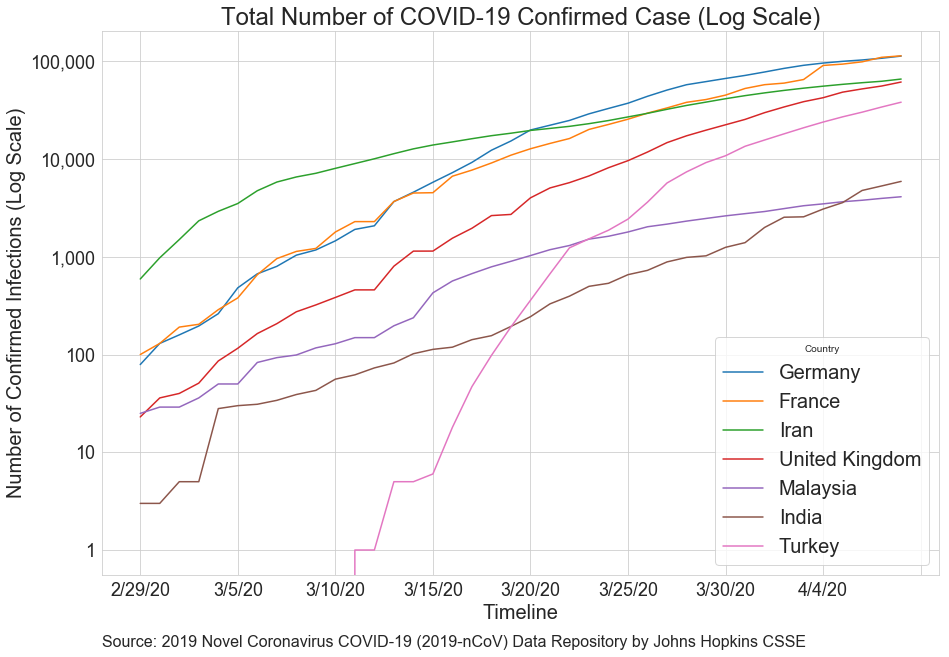

In [1649]:
china_df = country_df[["China", "OECD", "US", "Italy", "Iran", "Germany", 'United Kingdom', "France", 
                       "Spain",  "South Korea", "Singapore", "Turkey", "Bulgaria"]]
arr = ["Germany", "France", "Iran", 'United Kingdom', 
                       "Malaysia", "India", "Turkey"]
china_df = country_df[arr].iloc[-40:]

# china_df = country_df[["Mainland China", "US", "OECD"]]
china_df.head()

china_df.plot()
plt.ticklabel_format(style='plain', axis='y')
plt.yscale('log')
plt.ylabel("Number of Confirmed Infections (Log Scale)")
plt.xlabel("Timeline")
plt.title("Total Number of COVID-19 Confirmed Case (Log Scale)")
plt.annotate('Source: 2019 Novel Coronavirus COVID-19 (2019-nCoV) Data Repository by Johns Hopkins CSSE', (0,0),
             (0, -60), xycoords='axes fraction',
             textcoords='offset points', va='top', fontsize=16)

    
ax = plt.gca()
ax.get_yaxis().set_major_formatter(
    matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

# plt.xlim(0, 60)
plt.show()

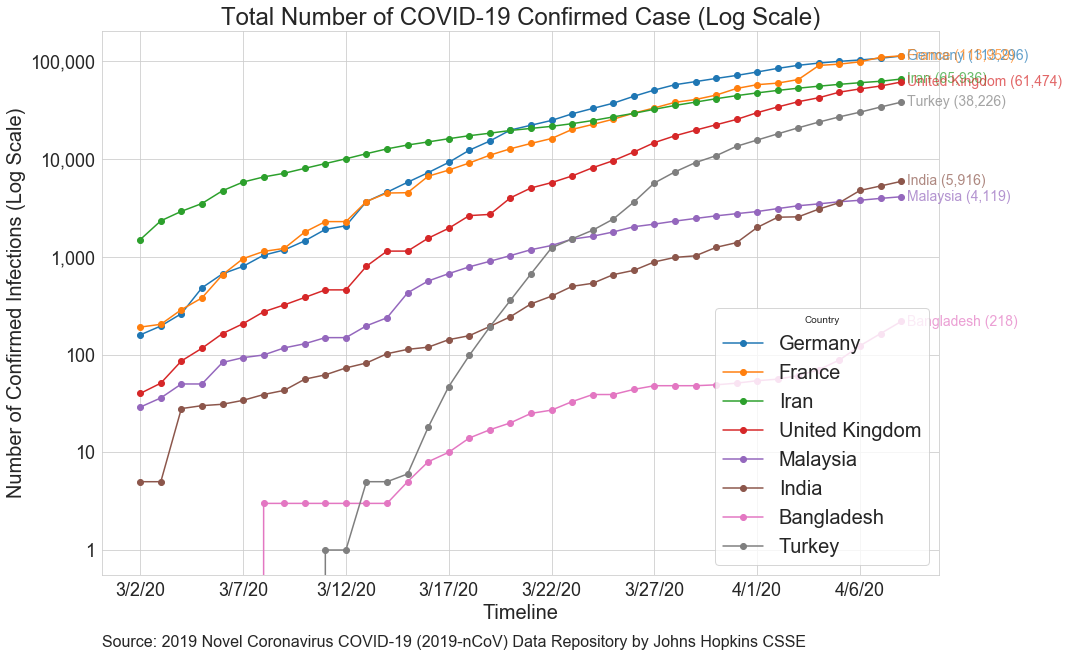

In [1650]:
china_df = country_df[["China", "OECD", "US", "Italy", "Iran", "Germany", 'United Kingdom', "France", 
                       "Spain",  "South Korea", "Singapore", "Turkey", "Bulgaria"]]


arr = ["Germany", "France", "Iran", 'United Kingdom', 
                       "Malaysia", "India", "Bangladesh", "Turkey"]
china_df = country_df[arr].iloc[-38:]


# china_df = country_df[["Mainland China", "US", "OECD"]]
china_df.head()

china_df.plot(style='o-', alpha=1)
plt.ticklabel_format(style='plain', axis='y')
plt.yscale('log')
# plt.ylabel("Number of Confirmed Infections")
plt.ylabel("Number of Confirmed Infections (Log Scale)")
plt.xlabel("Timeline")
# plt.title("Total Number of COVID-19 Confirmed Case")
plt.title("Total Number of COVID-19 Confirmed Case (Log Scale)")
plt.annotate('Source: 2019 Novel Coronavirus COVID-19 (2019-nCoV) Data Repository by Johns Hopkins CSSE', (0,0),
             (0, -60), xycoords='axes fraction',
             textcoords='offset points', va='top', fontsize=16)


ax = plt.gca()
for line, name in zip(ax.lines, arr):
    y = line.get_ydata()[-1]
    x = line.get_xdata()[-1]
#     print(x,y)
    ax.annotate(name + " (%s)" % format(int(y), ',') , xy=(x,y), xytext=(6,0), color=line.get_color(),  textcoords="offset points",
                size=14, va="center", alpha=0.7)

    
    
ax = plt.gca()
ax.get_yaxis().set_major_formatter(
    matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
plt.savefig("./exports/total_cases_world_log.png", dpi=160
           )
# plt.xlim(0, 60)
plt.show()

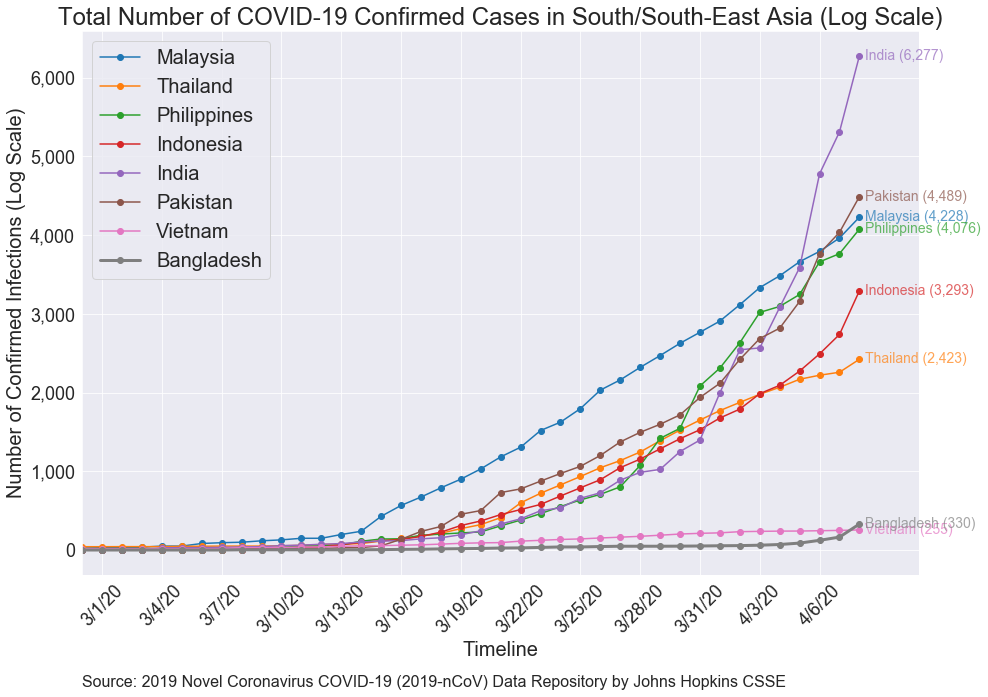

In [11]:
arr = ["Malaysia", "Thailand", "Philippines", "Indonesia", "India", "Pakistan", "Vietnam", "Bangladesh"]
china_df = country_df[arr]

# china_df.plot()

for c in arr[:-1]:
    plt.plot(china_df[c], 'o-', label=c)

plt.plot(china_df[arr[-1]], 'o-', linewidth=3, label="Bangladesh")
plt.ticklabel_format(style='plain', axis='y')
# plt.yscale('log')
plt.ylabel("Number of Confirmed Infections (Log Scale)")
# plt.ylabel("Number of Confirmed Infections")
plt.xlabel("Timeline") 
plt.title("Total Number of COVID-19 Confirmed Cases in South/South-East Asia (Log Scale)")
# plt.title("Total Number of COVID-19 Confirmed Cases in South/South-East Asia")

plt.annotate('Source: 2019 Novel Coronavirus COVID-19 (2019-nCoV) Data Repository by Johns Hopkins CSSE', (0,0),
             (0, -100), xycoords='axes fraction',
             textcoords='offset points', va='top', fontsize=16)


ax = plt.gca()


ax = plt.gca()
for line, name in zip(ax.lines, arr):
    y = line.get_ydata()[-1]
    x = line.get_xdata()[-1]
#     print(x,y)
    ax.annotate(name + " (%s)" % format(int(y), ',') , xy=(x,y), xytext=(6,0), color=line.get_color(),  textcoords="offset points",
                size=14, va="center", alpha=0.7)


ax.set_xticks(ax.get_xticks()[::3])
plt.xticks(rotation=45)

# plt.yscale('log')
ax.get_yaxis().set_major_formatter(
    matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
# plt.hlines(0,0,80, label="y = 0")
plt.legend()
plt.xlim(38,80)

plt.savefig("./exports/total_cases_se_asia_log.png", dpi=160
           )


Text(0.5, 1.0, 'Total Number of Infected')

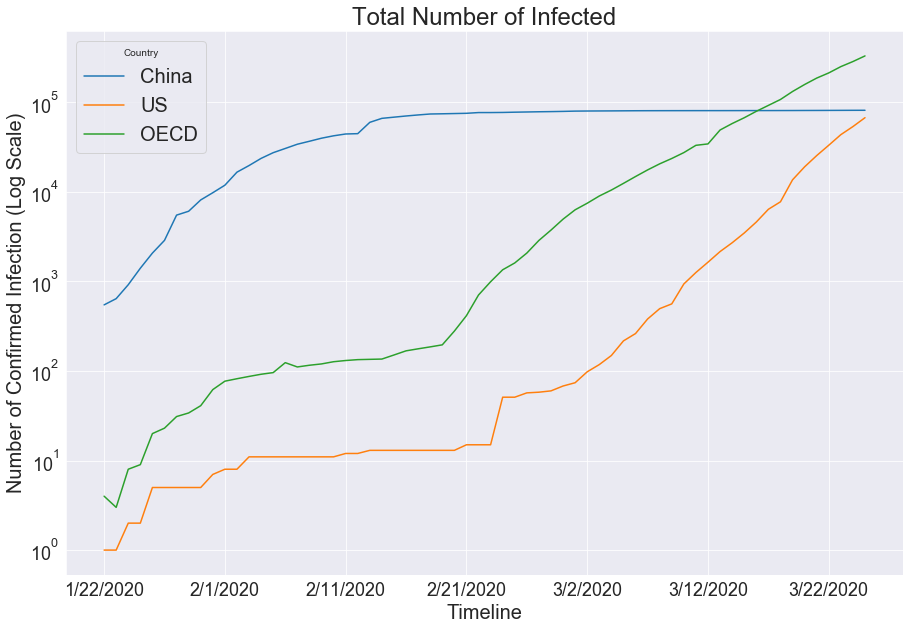

In [433]:
china_df = country_df[["China", "US", "OECD"]]

china_df.plot()
plt.ticklabel_format(style='plain', axis='y')
plt.yscale('log')
plt.ylabel("Number of Confirmed Infection (Log Scale)")
plt.xlabel("Timeline")
plt.title("Total Number of Infected")

In [1697]:
china_df.tail()

Country         China             US          OECD          Iran          Italy        Turkey        Canada        Brazil     Malaysia  Bangladesh          Spain        Germany         France        India  day_no
4/4/20   82495.333333  276017.333333  8.667767e+05  53131.333333  119900.333333  20996.666667  12220.000000   9153.333333  3310.666667   62.333333  119144.000000   90681.666667   71993.000000  2730.666667    80.0
4/5/20   82552.000000  307169.333333  9.398397e+05  55717.333333  124469.000000  23974.666667  13710.666667  10182.000000  3492.666667   73.000000  125671.000000   95791.333333   83274.333333  3079.000000    81.0
4/6/20   82603.333333  337529.666667  1.009216e+06  58156.333333  128709.000000  27073.333333  15086.000000  11217.000000  3646.000000   93.666667  131496.333333   99863.000000   94528.000000  3816.000000    82.0
4/7/20   82661.666667  366654.000000  1.071105e+06  60438.333333  132360.333333  30465.000000  16717.333333  12441.666667  3806.000000  125.000000  136754.333333  103720.000000  100933.666667  4559.000000    83.0
4/8/20   82730.666667  399036.333333  1.137142e+06  63008.333333  135851.666667  34184.000000  17910.000000  14130.000000  3958.333333  168.333333  142279.000000  108111.000000  107662.333333  5335.000000    84.0

In [771]:
mlp.rcParams['figure.figsize'] = 15,10

In [1684]:
datetime.date(2020,1,14) + datetime.timedelta(days=80)

datetime.date(2020, 4, 3)

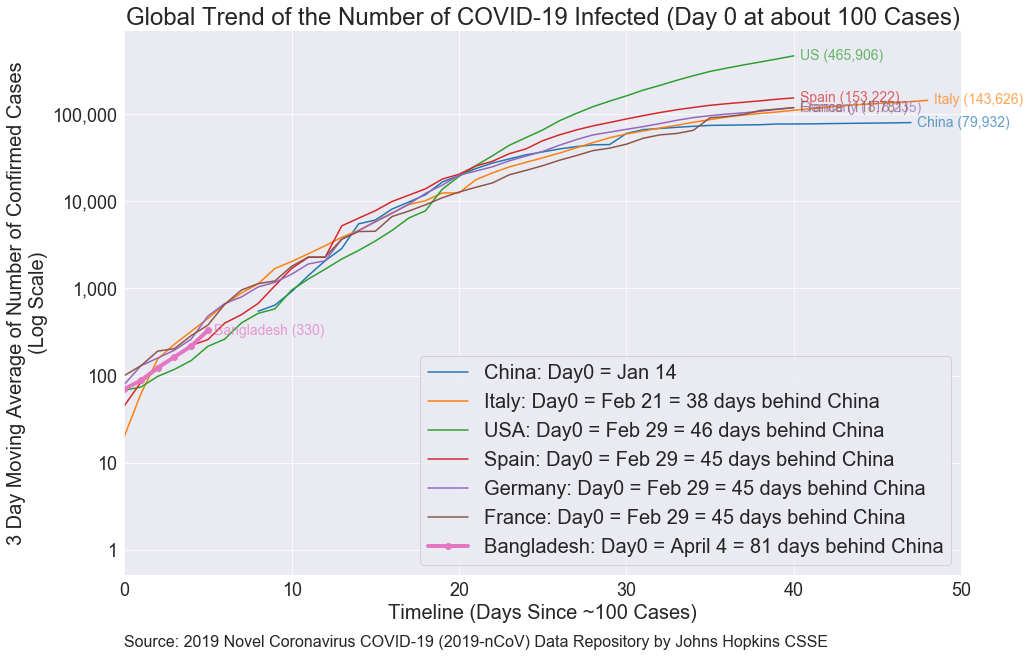

In [28]:
china_df = country_df[["China", "US", "OECD", "Iran", "Italy", "Turkey", "Canada", "Brazil", 
                       "Malaysia", "Bangladesh", "Spain", "Germany", "France", "India", "Pakistan"]].copy()
china_df["day_no"] = np.array(range(len(china_df))) + 8 
china_df = china_df.rolling(1, min_periods=1).mean()


ax = plt.gca()

plt.plot(china_df.day_no[:40] , china_df["China"][:40], label="China: Day0 = Jan 14")
# plt.plot(china_df.day_no - 31 , china_df["OECD"], label="OECD: Day0 = Feb 22 = 31 days behind China")
plt.plot(china_df.day_no - 38 , china_df["Italy"], label="Italy: Day0 = Feb 21 = 38 days behind China")
plt.plot(china_df.day_no - 46 , china_df["US"], label="USA: Day0 = Feb 29 = 46 days behind China")

# plt.plot(china_df.day_no - 55, china_df["Canada"], label="Canada: Day0 = Mar 9 = 55 days behind China")

# plt.plot(china_df.day_no - 52, china_df["Malaysia"], label="Mayasia: Day0 = Mar 12 = 52 days behind China")
plt.plot(china_df.day_no - 46 , china_df["Spain"], label="Spain: Day0 = Feb 29 = 45 days behind China")
plt.plot(china_df.day_no - 46 , china_df["Germany"], label="Germany: Day0 = Feb 29 = 45 days behind China")
plt.plot(china_df.day_no - 46 , china_df["France"], label="France: Day0 = Feb 29 = 45 days behind China")
# plt.plot(china_df.day_no - 40 , china_df["Iran"], label="Iran: Day0 = Mar 12 = 58 days behind China")
plt.plot(china_df.day_no - 81, china_df["Bangladesh"], 
         'o-', linewidth=4, label="Bangladesh: Day0 = April 4 = 81 days behind China")
# plt.plot(china_df.day_no - 58 , china_df["Turkey"], label="Turkey: Day0 = Mar 12 = 58 days behind China")
# plt.plot(china_df.day_no - 60 , china_df["India"], label="India: Day0 = Mar 12 = 58 days behind China")
# plt.plot(china_df.day_no - 60 , china_df["Pakistan"], label="India: Day0 = Mar 12 = 58 days behind China")
# plt.plot(china_df.day_no - 58, china_df["Brazil"], label="Brazil: Day0 = Mar 20 = 58 days behind China")

for line, name in zip(ax.lines, ["China", "Italy", "US", "Spain", "Germany", "France", "Bangladesh"]):
    y = line.get_ydata()[-1]
    x = line.get_xdata()[-1]
#     print(x,y)
    ax.annotate(name + " (%s)" % format(int(y), ',') , xy=(x,y), xytext=(6,0), color=line.get_color(),  textcoords="offset points",
                size=14, va="center", alpha=0.7)

    
# plt.plot(china_df.day_no - 58, china_df["Turke`y"], label="Turkey: Day0 = Mar 20 = 58 days behind China")
plt.xlim(0,50)


# plt.ylim(0,1000000)
# ["Mainland China", "US", "OECD"]
# plt.ticklabel_format(style='plain', axis='y')
plt.yscale('log')
# plt.ylim(100,1000)
plt.ylabel("3 Day Moving Average of ddNumber of Confirmed Cases\n(Log Scale)")
plt.xlabel("Timeline (Days Since ~100 Cases)")
plt.legend()
plt.title("Global Trend of the Number of COVID-19 Infected (Day 0 at about 100 Cases)")

plt.annotate('Source: 2019 Novel Coronavirus COVID-19 (2019-nCoV) Data Repository by Johns Hopkins CSSE', (0,0),
             (0, -60), xycoords='axes fraction',
             textcoords='offset points', va='top', fontsize=16)

ax = plt.gca()
ax.get_yaxis().set_major_formatter(
    matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
sns.despine()

# plt.savefig("./exports/global_trend_since_100_cases.png", dpi=160
#            )

In [1696]:
china_df

Country         China             US          OECD          Iran          Italy        Turkey        Canada        Brazil     Malaysia  Bangladesh          Spain        Germany         France        India  day_no
1/22/20    548.000000       1.000000  4.000000e+00      0.000000       0.000000      0.000000      0.000000      0.000000     0.000000    0.000000       0.000000       0.000000       0.000000     0.000000     8.0
1/23/20    595.500000       1.000000  4.000000e+00      0.000000       0.000000      0.000000      0.000000      0.000000     0.000000    0.000000       0.000000       0.000000       0.000000     0.000000     8.5
1/24/20    703.666667       1.333333  5.333333e+00      0.000000       0.000000      0.000000      0.000000      0.000000     0.000000    0.000000       0.000000       0.000000       0.666667     0.000000     9.0
1/25/20    989.666667       1.666667  7.000000e+00      0.000000       0.000000      0.000000      0.000000      0.000000     1.000000    0.000000       0.000000       0.000000       1.666667     0.000000    10.0
1/26/20   1467.000000       3.000000  1.233333e+01      0.000000       0.000000      0.000000      0.333333      0.000000     2.333333    0.000000       0.000000       0.000000       2.666667     0.000000    11.0
1/27/20   2119.333333       4.000000  1.733333e+01      0.000000       0.000000      0.000000      0.666667      0.000000     3.666667    0.000000       0.000000       0.333333       3.000000     0.000000    12.0
1/28/20   3487.000000       5.000000  2.466667e+01      0.000000       0.000000      0.000000      1.333333      0.000000     4.000000    0.000000       0.000000       1.666667       3.333333     0.000000    13.0
1/29/20   4824.333333       5.000000  2.933333e+01      0.000000       0.000000      0.000000      1.666667      0.000000     5.000000    0.000000       0.000000       3.000000       4.000000     0.000000    14.0
1/30/20   6579.000000       5.000000  3.533333e+01      0.000000       0.000000      0.000000      2.000000      0.000000     6.333333    0.000000       0.000000       4.000000       4.666667     0.333333    15.0
1/31/20   8010.000000       5.666667  4.566667e+01      0.000000       0.666667      0.000000      2.666667      0.000000     7.666667    0.000000       0.000000       4.333333       5.000000     0.666667    16.0
2/1/20    9944.666667       6.666667  6.000000e+01      0.000000       1.333333      0.000000      3.333333      0.000000     8.000000    0.000000       0.333333       5.666667       5.333333     1.000000    17.0
2/2/20   12774.333333       7.666667  7.366667e+01      0.000000       2.000000      0.000000      4.000000      0.000000     8.000000    0.000000       0.666667       7.666667       5.666667     1.333333    18.0
2/3/20   16079.000000       9.000000  8.200000e+01      0.000000       2.000000      0.000000      4.000000      0.000000     8.000000    0.000000       1.000000      10.000000       6.000000     2.000000    19.0
2/4/20   20017.666667      10.000000  8.700000e+01      0.000000       2.000000      0.000000      4.000000      0.000000     8.666667    0.000000       1.000000      11.333333       6.000000     2.666667    20.0
2/5/20   23621.000000      11.000000  9.166667e+01      0.000000       2.000000      0.000000      4.333333      0.000000    10.000000    0.000000       1.000000      12.000000       6.000000     3.000000    21.0
2/6/20   27244.666667      11.000000  9.633333e+01      0.000000       2.000000      0.000000      4.666667      0.000000    11.333333    0.000000       1.000000      12.000000       6.000000     3.000000    22.0
2/7/20   30712.333333      11.000000  1.026667e+02      0.000000       2.333333      0.000000      5.666667      0.000000    12.000000    0.000000       1.000000      12.333333       6.000000     3.000000    23.0
2/8/20   33837.000000      11.000000  1.093333e+02      0.000000       2.666667      0.000000      6.333333      0.000000    13.333333    0.000000       1.000000     

In [1673]:
62 - 46

16

44.0 78568.14285714286
41.0 115250.57142857143
39.0 50187.57142857143
21.0 18585.14285714286


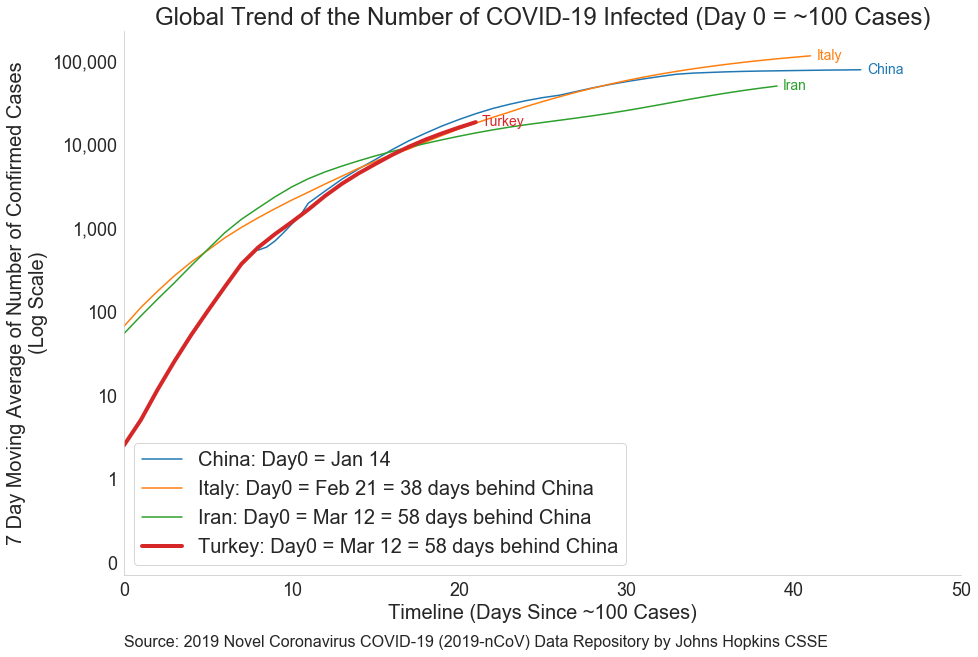

In [1441]:
china_df = country_df[["China", "US", "OECD", "Iran", "Italy", "Turkey", "Canada", "Brazil", 
                       "Malaysia", "Bangladesh", "Spain", "Germany"]].copy()
china_df["day_no"] = np.array(range(len(china_df))) + 8 
china_df = china_df.rolling(7, min_periods=1).mean()


ax = plt.gca()

plt.plot(china_df.day_no[:40] , china_df["China"][:40], label="China: Day0 = Jan 14")
# plt.plot(china_df.day_no - 31 , china_df["OECD"], label="OECD: Day0 = Feb 22 = 31 days behind China")
plt.plot(china_df.day_no - 38 , china_df["Italy"], label="Italy: Day0 = Feb 21 = 38 days behind China")
# plt.plot(china_df.day_no - 46 , china_df["US"], label="USA: Day0 = Feb 29 = 46 days behind China")
# plt.plot(china_df.day_no - 58, china_df["Brazil"], label="Brazil: Day0 = Mar 20 = 58 days behind China")
# plt.plot(china_df.day_no - 55, china_df["Canada"], label="Canada: Day0 = Mar 9 = 55 days behind China")
# plt.plot(china_df.day_no - 70, china_df["Bangladesh"], label="Bangladesh: Day0 = Mar 30 = 70 days behind China")

# plt.plot(china_df.day_no - 52, china_df["Malaysia"], label="Mayasia: Day0 = Mar 12 = 52 days behind China")
# plt.plot(china_df.day_no - 46 , china_df["Spain"], label="Spain: Day0 = Feb 29 = 45 days behind China")
plt.plot(china_df.day_no - 40 , china_df["Iran"], label="Iran: Day0 = Mar 12 = 58 days behind China")
plt.plot(china_df.day_no - 58 , china_df["Turkey"], label="Turkey: Day0 = Mar 12 = 58 days behind China", 
         linewidth=4)

for line, name in zip(ax.lines, ["China", "Italy", "Iran", "Turkey", ]):
    y = line.get_ydata()[-1]
    x = line.get_xdata()[-1]
    print(x,y)
    ax.annotate(name, xy=(x,y), xytext=(6,0), color=line.get_color(),  textcoords="offset points",
                size=14, va="center")
    
# plt.plot(china_df.day_no - 58, china_df["Turke`y"], label="Turkey: Day0 = Mar 20 = 58 days behind China")
plt.xlim(0,50)
# plt.ylim(0,1000000)
# ["Mainland China", "US", "OECD"]
plt.ticklabel_format(style='plain', axis='y')
plt.yscale('log')
plt.ylabel("7 Day Moving Average of Number of Confirmed Cases\n(Log Scale)")
plt.xlabel("Timeline (Days Since ~100 Cases)")
plt.legend()
plt.title("Global Trend of the Number of COVID-19 Infected (Day 0 = ~100 Cases)")

plt.annotate('Source: 2019 Novel Coronavirus COVID-19 (2019-nCoV) Data Repository by Johns Hopkins CSSE', (0,0),
             (0, -60), xycoords='axes fraction',
             textcoords='offset points', va='top', fontsize=16)

ax = plt.gca()
ax.get_yaxis().set_major_formatter(
    matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
sns.despine()

In [788]:
ax.get_yaxis_transform()

In [17]:
from sklearn import linear_model
from scipy.special import expit
from sklearn import preprocessing

In [18]:
clf = linear_model.LogisticRegression(C=1e5,max_iter=1000)

In [114]:
c = "South Korea"
china_data = country_df[[c]].copy()
china_data.head()

Country  South Korea
1/22/20            1
1/23/20            1
1/24/20            2
1/25/20            2
1/26/20            3

In [115]:
china_data["num_days"] = np.arange(len(china_data))
china_data.head()

Country  South Korea  num_days
1/22/20            1         0
1/23/20            1         1
1/24/20            2         2
1/25/20            2         3
1/26/20            3         4

In [118]:
X, y = china_data[["num_days"]].values, china_data[c].values
X1 = preprocessing.scale(X)
y1 = y

In [119]:
clf.fit(X1, y1)

/Users/tarik/.local/share/virtualenvs/alakazam-hdvw4kJ2/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=100000.0, class_weight=None, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=1000, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [120]:
X1,y1

(array([[-1.6955825 ],
        [-1.62186152],
        [-1.54814054],
        [-1.47441956],
        [-1.40069858],
        [-1.32697761],
        [-1.25325663],
        [-1.17953565],
        [-1.10581467],
        [-1.03209369],
        [-0.95837272],
        [-0.88465174],
        [-0.81093076],
        [-0.73720978],
        [-0.6634888 ],
        [-0.58976782],
        [-0.51604685],
        [-0.44232587],
        [-0.36860489],
        [-0.29488391],
        [-0.22116293],
        [-0.14744196],
        [-0.07372098],
        [ 0.        ],
        [ 0.07372098],
        [ 0.14744196],
        [ 0.22116293],
        [ 0.29488391],
        [ 0.36860489],
        [ 0.44232587],
        [ 0.51604685],
        [ 0.58976782],
        [ 0.6634888 ],
        [ 0.73720978],
        [ 0.81093076],
        [ 0.88465174],
        [ 0.95837272],
        [ 1.03209369],
        [ 1.10581467],
        [ 1.17953565],
        [ 1.25325663],
        [ 1.32697761],
        [ 1.40069858],
        [ 1

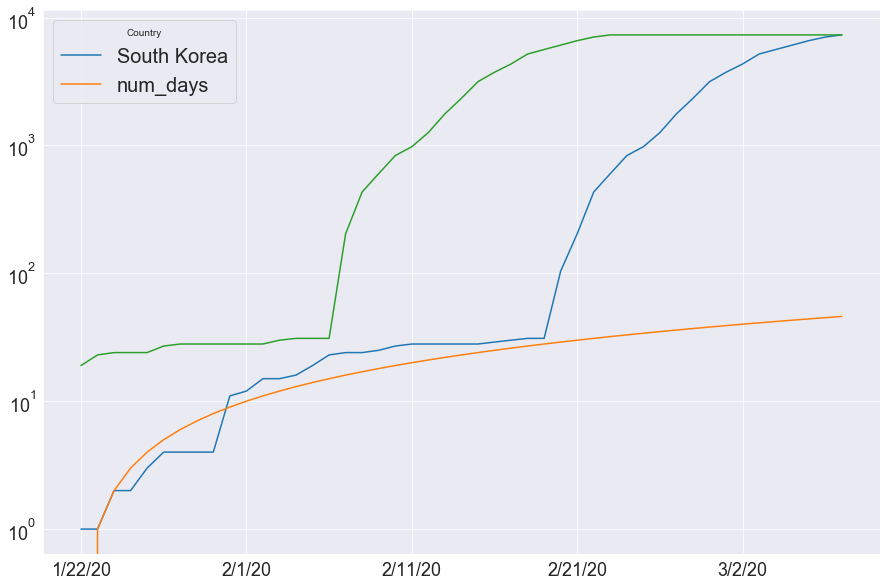

In [125]:
china_data.plot()
plt.plot(clf.predict(X1 + 1))
plt.yscale('log')

In [124]:
clf.predict(X1)

array([   1,    1,    2,    2,    3,    4,    4,    4,    4,   11,   12,
         15,   15,   16,   19,   23,   24,   24,   25,   27,   28,   28,
         28,   28,   28,   29,   30,   31,   31,  104,  204,  433,  602,
        833,  977, 1261, 1766, 2337, 3150, 3736, 4335, 5186, 5621, 6088,
       6593, 7041, 7314])

In [153]:
all_country_df = country_df.drop(["Mainland China"], axis=1).sum(axis=1)
all_country_df = pd.DataFrame(all_country_df, columns=["Rest of the World"])

In [154]:
all_country_df.head()

Rest of the World
1/22/20                  8
1/23/20                 14
1/24/20                 25
1/25/20                 35
1/26/20                 56

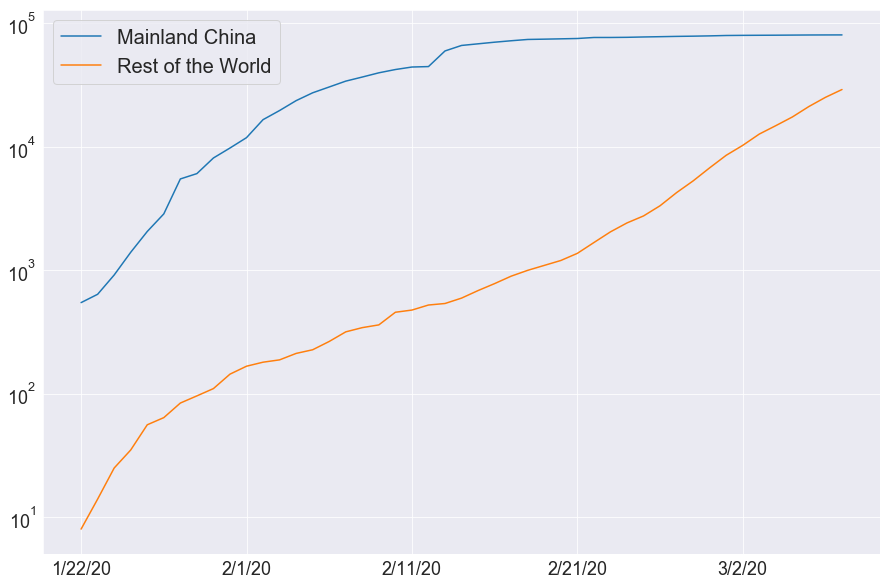

In [168]:
# all_country_df.plot()
pd.merge(country_df[["Mainland China"]], all_country_df,left_index=True, right_index=True).plot()
plt.yscale('log')

In [870]:
df.sum()

Country/Region    AfghanistanAlbaniaAlgeriaAndorraAngolaAntigua ...
1/22/20                                                         555
1/23/20                                                         654
1/24/20                                                         941
1/25/20                                                        1434
1/26/20                                                        2118
1/27/20                                                        2927
1/28/20                                                        5578
1/29/20                                                        6166
1/30/20                                                        8234
1/31/20                                                        9927
2/1/20                                                        12038
2/2/20                                                        16787
2/3/20                                                        19881
2/4/20                                          

In [8]:
dfs[dfs.Country == "United States"]

Country  HealthScore  Confirmed  Total (#)  Confirmed  New (#)  Deaths  Total (#)  Deaths  New (#)  Recovered  Total (#) Recovered  New (#)  Cases / 1M  (#)
7  United States  25 Terrible                   974               390.0               30.0              8.0                   8.0                NaN              3.0

In [16]:
merged_df= pd.merge(country_df0, dfs, left_index=True, right_on="Country")

In [17]:
merged_df

1/22/20  1/23/20  1/24/20  1/25/20  1/26/20  1/27/20  1/28/20  1/29/20  1/30/20  1/31/20  2/1/20  2/2/20  2/3/20  2/4/20  2/5/20  2/6/20  2/7/20  2/8/20  2/9/20  2/10/20  2/11/20  2/12/20  2/13/20  2/14/20  2/15/20  2/16/20  2/17/20  2/18/20  2/19/20  2/20/20  2/21/20  2/22/20  2/23/20  2/24/20  2/25/20  2/26/20  2/27/20  2/28/20  2/29/20  3/1/20  3/2/20  3/3/20  3/4/20  3/5/20  3/6/20  3/7/20  3/8/20  3/9/20  3/10/20  3/11/20                 Country HealthScore  Cases  Total (#) Cases  New (#)  Deaths  Total (#)  Deaths  New (#)  Recovered  Total (#) Recovered  New (#)  case_per_mil  Unnamed: 9
84         0        0        0        0        0        0        0        0        0        0       0       0       0       0       0       0       0       0       0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        1        1        1        1        1        1       1       1       1       1       1       1       1       4       4        5        7             Afghanistan         NaN                 7            NaN                NaN              NaN                   NaN                NaN           0.2         NaN
55         0        0        0        0        0        0        0        0        0        0       0       0       0       0       0       0       0       0       0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0       0       0       0       0       0       0       0       0       2       10       12                 Albania         NaN                23            +11                1.0              NaN                   NaN                NaN           7.5         NaN
53         0        0        0        0        0        0        0        0        0        0       0       0       0       0       0       0       0       0       0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        1        1        1        1        1       1       3       5      12      12      17      17      19      20       20       20                 Algeria         NaN                24             +4                1.0              1.0                   8.0                 +8           0.6         NaN
107        0        0        0        0        0        0        0        0        0        0       0       0       0       0       0       0       0       0       0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0       0       1       1       1       1       1       1       1       1        1        1                 Andorra         NaN                 1            NaN                NaN              NaN                   NaN                NaN           NaN         NaN
60         0        0        0        0        0        0        0        0        0        0       0       0       0       0       0       0       0       0       0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0       0       0       1       1       1       2       8      12      12       17       19               Argentina         NaN                21             +2                1.0              NaN                   NaN                NaN           0.5         NaN
85         0        0        0        0        0        0        0        0        0        0       0       0       0       0       0       0       0       0       0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0       1    

In [18]:
set(country_df0.index) - set(merged_df.Country) 

{'China',
 'Congo (Kinshasa)',
 "Cote d'Ivoire",
 'Cruise Ship',
 'French Guiana',
 'Holy See',
 'Korea, South',
 'Martinique',
 'Reunion',
 'Taiwan*',
 'United Kingdom'}

In [147]:
oecd_df = pd.read_html("https://en.wikipedia.org/wiki/List_of_OECD_countries_by_GDP_per_capita")[1]

In [150]:
oecd_df.Country.values

array(['Luxembourg', 'Ireland', 'Switzerland', 'Norway', 'United States',
       'Iceland', 'Netherlands', 'Austria', 'Denmark', 'Australia',
       'Germany', 'Sweden', 'Belgium', 'Finland', 'Canada',
       'United Kingdom', 'France', 'Japan', 'Italy', 'New Zealand',
       'OECD', 'South Korea', 'Spain', 'Israel', 'Czech Republic',
       'Slovenia', 'Estonia', 'Slovakia', 'Portugal', 'Poland', 'Hungary',
       'Greece', 'Turkey', 'Chile', 'Mexico'], dtype=object)

In [43]:
# df2[df2.Country == "US"]

Province/State Country  1/22/20  1/23/20  1/24/20  1/25/20  1/26/20  1/27/20  1/28/20  1/29/20  1/30/20  1/31/20  2/1/20  2/2/20  2/3/20  2/4/20  2/5/20  2/6/20  2/7/20  2/8/20  2/9/20  2/10/20  2/11/20  2/12/20  2/13/20  2/14/20  2/15/20  2/16/20  2/17/20  2/18/20  2/19/20  2/20/20  2/21/20  2/22/20  2/23/20  2/24/20  2/25/20  2/26/20  2/27/20  2/28/20  2/29/20  3/1/20  3/2/20  3/3/20  3/4/20  3/5/20  3/6/20  3/7/20  3/8/20  3/9/20  3/10/20  3/11/20
100                Washington      US        0        0        0        0        0        0        0        0        0        0       0       0       0       0       0       0       0       0       0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0       0       0       0       0       0       0       0       0       0      267      366
101                  New York      US        0        0        0        0        0        0        0        0        0        0       0       0       0       0       0       0       0       0       0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0       0       0       0       0       0       0       0       0       0      173      220
102                California      US        0        0        0        0        0        0        0        0        0        0       0       0       0       0       0       0       0       0       0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0       0       0       0       0       0       0       0       0       0      144      177
103             Massachusetts      US        0        0        0        0        0        0        0        0        0        0       0       0       0       0       0       0       0       0       0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0       0       0       0       0       0       0       0       0       0       92       95
104          Diamond Princess      US        0        0        0        0        0        0        0        0        0        0       0       0       0       0       0       0       0       0       0        0        0        0        0        0        0        0        0        0        0        0        0        0        0       36       36       42       42       44       44      44      45      45      45      45      45      45      45      45       46       46
105            Grand Princess      US        0        0        0        0        0        0        0        0        0        0       0       0       0       0       0       0       0       0       0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0       0       0       0       0       0       0      21      21      21       21       21
106                   Georgia      US        0        0        0        0        0        0        0        0        0        0       0       0       0       0       0       0       0       0       0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0       0       0       0       0       0       0       0       0       0       17       23
107                  Colorado      US        0        0        0        0        0        0        0        0        0        0       0       0       0       0       0       0       0       0       0        0        0        0        0        0        0  

In [89]:
np.log(164700000)

18.91963619514787

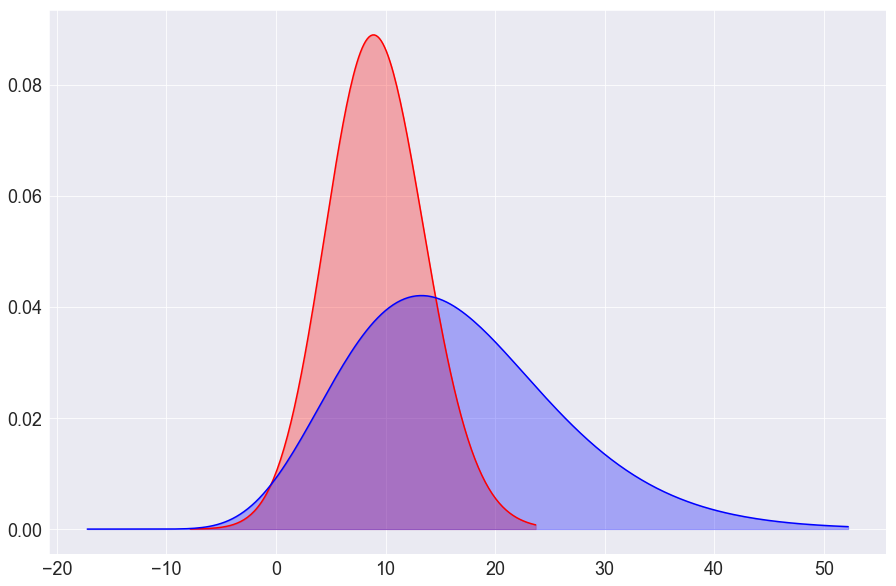

In [155]:
import numpy as np
import seaborn as sns
import scipy.stats as stats
import matplotlib.pyplot as plt

x = [1.883830, 4, 8.791209, 9.262166, 13, 13.5, 14]
y = [2, 4, 8.7, 11, 12, 14, 20, 22, 26, 30, 33]
ax = sns.distplot(x, fit_kws={"color":"red"}, kde=False,
        fit=stats.gamma, hist=None, label="label 1");
ax = sns.distplot(y, fit_kws={"color":"blue"}, kde=False,
        fit=stats.gamma, hist=None, label="label 2");

# Get the two lines from the axes to generate shading
l1 = ax.lines[0]
l2 = ax.lines[1]

# Get the xy data from the lines so that we can shade
x1 = l1.get_xydata()[:,0]
y1 = l1.get_xydata()[:,1]
x2 = l2.get_xydata()[:,0]
y2 = l2.get_xydata()[:,1]
ax.fill_between(x1,y1, color="red", alpha=0.3)
ax.fill_between(x2,y2, color="blue", alpha=0.3)

plt.show(block=False)

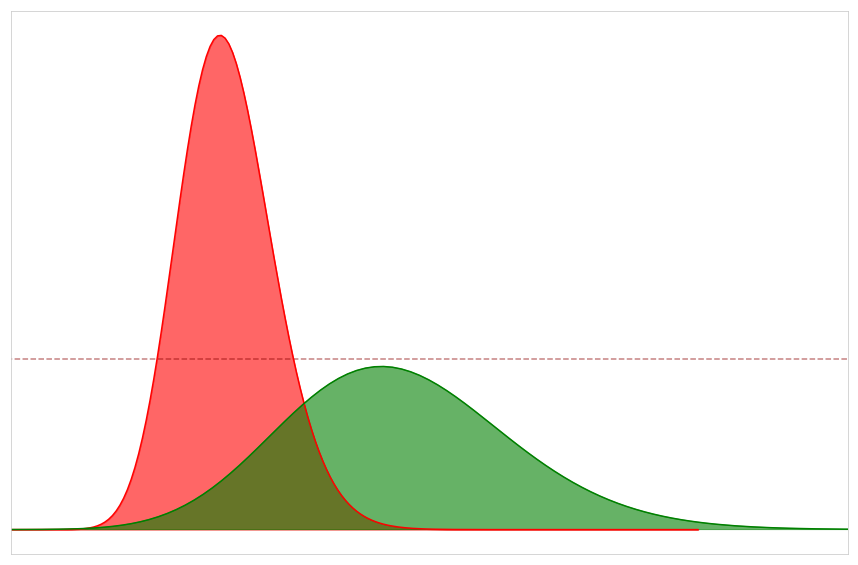

In [1469]:
import numpy as np
import scipy.stats as stats 
from matplotlib.font_manager import FontProperties

mlp.rcParams['figure.figsize'] = 15, 10

sns.set_style("whitegrid", {'axes.grid' : True})

x = np.linspace (0, 100, 200) 
y1 = stats.gamma.pdf(x, a=40, loc=-3) #a is alpha, loc is beta???
plt.plot(1.25 * x, y1, "r-", label=(r'$\alpha=29, \beta=3$')) 


y1 = stats.gamma.pdf(x, a=40, loc=-15) #a is alpha, loc is beta???
plt.plot( 3. * x, .33 * y1, "g-", label=(r'$\alpha=29, \beta=3$')) 

ax = plt.gca()

# Get the two lines from the axes to generate shading
l1 = ax.lines[0]
l2 = ax.lines[1]

# Get the xy data from the lines so that we can shade
x1 = l1.get_xydata()[:,0]
y1 = l1.get_xydata()[:,1]
x2 = l2.get_xydata()[:,0]
y2 = l2.get_xydata()[:,1]
ax.fill_between(x1,y1, color="red", alpha=0.6)
ax.fill_between(x2,y2, color="green", alpha=0.6)
# plt.ylim([0,0.08])
plt.xlim([10,150])

plt.hlines(0.022,0, 150, 'darkred', '--', alpha=0.5)


# plt.annotate('Source: CDC / World Health Organization (WHO)', (0,0),
#              (0, -60), xycoords='axes fraction',
#              textcoords='offset points', va='top', fontsize=16)

# sns.despine()
plt.xticks([])
plt.yticks([])


# plt.xlabel(u"প্রথম সংক্রমণের দিন থেকে দিনসংখ্যা", fontproperties=prop)
# plt.ylabel(u"প্রতিদিন আক্রান্ত রোগীর সংখ্যা", fontproperties=prop, font)

plt.savefig("test.svg", format="svg")
plt.show()



Text(0.5, 0, 'আমার')

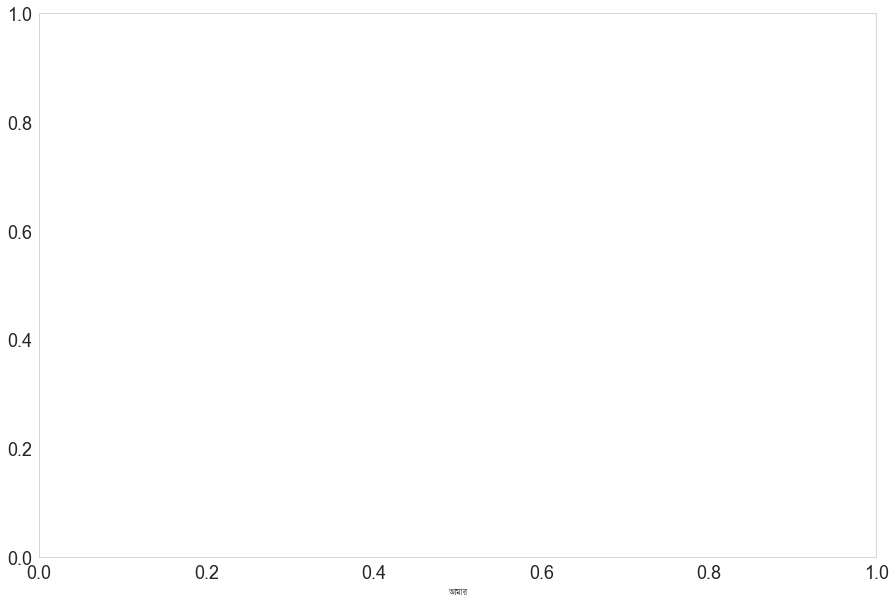

In [79]:

plt.figure() 
prop = FontProperties()
prop.set_file('./SolaimanLipi.ttf')
plt.xlabel(u"আমার", fontproperties=prop)

In [103]:
# testing data: https://ourworldindata.org/covid-testing

In [124]:
# m = total number of people who caught the disease,

# and perhaps a csv file of the following:
# C(t): number of new individual showed symptoms on day t
# D(t): number of individuals who die or recover from the infectious class at day t

In [1652]:
# confirmed_df = pd.read_csv("https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Confirmed.csv")
confirmed_df = pd.read_csv("https://www.soothsawyer.com/wp-content/uploads/2020/03/time_series_19-covid-Confirmed.csv")

In [1653]:
# death_df = pd.read_csv("https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Deaths.csv")
death_df = pd.read_csv("https://www.soothsawyer.com/wp-content/uploads/2020/03/time_series_19-covid-Deaths.csv")

In [1654]:
# recov_df = pd.read_csv("https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Recovered.csv")
recov_df = pd.read_csv("https://www.soothsawyer.com/wp-content/uploads/2020/03/time_series_19-covid-Recovered.csv")


In [1656]:
tmp_df = confirmed_df[confirmed_df['Country/Region'] == "US"].copy()

In [1657]:
def get_state(s):
    arr = s.split(",")
    
    if len(arr) > 1:
        return arr[1]
    else:
        return s
    
tmp_df["State"] = [get_state(s) for s in tmp_df["Province/State"]]

In [1658]:
tmp_df.sort_values("State")

Country/Region                Province/State      Long      Lat  1/22/2020  1/23/2020  1/24/2020  1/25/2020  1/26/2020  1/27/2020  1/28/2020  1/29/2020  1/30/2020  1/31/2020  2/1/2020  2/2/2020  2/3/2020  2/4/2020  2/5/2020  2/6/2020  2/7/2020  2/8/2020  2/9/2020  2/10/2020  2/11/2020  2/12/2020  2/13/2020  2/14/2020  2/15/2020  2/16/2020  2/17/2020  2/18/2020  2/19/2020  2/20/2020  2/21/2020  2/22/2020  2/23/2020  2/24/2020  2/25/2020  2/26/2020  2/27/2020  2/28/2020  2/29/2020  3/1/2020  3/2/2020  3/3/2020  3/4/2020  3/5/2020  3/6/2020  3/7/2020  3/8/2020  3/9/2020  3/10/2020  3/11/2020  3/12/2020  3/13/2020  3/14/2020  3/15/2020  3/16/2020  3/17/2020  3/18/2020  3/19/2020  3/20/2020  3/21/2020  3/22/2020  3/23/2020  3/24/2020  3/25/2020  3/26/2020  3/27/2020  3/28/2020  3/29/2020  3/30/2020  3/31/2020  4/1/2020  4/2/2020  4/3/2020  4/4/2020  4/5/2020  4/6/2020  4/7/2020  4/8/2020                         State
378             US           Maricopa County, AZ -112.4291  33.2918          0          0          0          0          1          1          1          1          1          1         1         1         1         1         1         1         1         1         1          1          1          1          1          1          1          1          1          1          1          1          1          1          1          1          1          1          1          1          1         1         1         1         1         1         2         2         2         2          0          0          0          0          0          0          0          0          0          0          0          0          0          0          0          0          0          0          0          0          0          0         0         0         0         0         0         0         0         0                            AZ
431             US                      Pima, AZ -111.6661  32.0575          0          0          0          0          0          0          0          0          0          0         0         0         0         0         0         0         0         0         0          0          0          0          0          0          0          0          0          0          0          0          0          0          0          0          0          0          0          0          0         0         0         0         0         0         0         0         0         0          0          0          0          0          0          0          0          0          0          0          0          0          0          0          0          0          0          0          0          0          0          0         0         0         0         0         0         0         0         0                            AZ
432             US              Pinal County, AZ -111.2845  32.8162          0          0          0          0          0          0          0          0          0          0         0         0         0         0         0         0         0         0         0          0          0          0          0          0          0          0          0          0          0          0          0          0          0          0          0          0          0          0          0         0         0         0         0         0         0         2         2         2          0          0          0          0          0          0          0          0          0          0          0          0          0          0          0          0          0          0          0          0          0          0         0         0         0         0         0         0         0         0                            AZ
509             US               Yolo County, CA -121.9018  38.7646          0          0          0          0          0          0          0          0          0          0         0         0         0         0         0         0         0         0         0          0      

In [1538]:
def filter_fn_hubei(_tmp_df):
    return _tmp_df[_tmp_df["Province/State"] == "Hubei"].head(1)
    
    
def get_process_fn(filter_fn=filter_fn_hubei):
    def process_fn(_tmp_df, col_name):
        _tmp_df = filter_fn(_tmp_df)
        tmp_df = _tmp_df.drop(['Province/State', 'Country/Region', 'Lat', 'Long'], axis=1).copy().T
        tmp_df.columns = [col_name]
        
        return tmp_df
    
    return process_fn

def generate_data(filter_fn=filter_fn_hubei):
    process_fn = get_process_fn(filter_fn=filter_fn)
    df_c = process_fn(confirmed_df, "num_confirmed")
    df_d = process_fn(death_df, "num_death")
    df_r = process_fn(recov_df, "num_recovered")
    
    tmp_df = pd.merge(df_c, pd.merge(df_d, df_r, left_index=True, right_index=True), left_index=True, right_index=True)
    
    tmp_df["num_confirmed_that_day"] = tmp_df.num_confirmed.diff()
    tmp_df["num_death_that_day"] = tmp_df.num_death.diff()
    tmp_df["num_recovered_that_day"] = tmp_df.num_recovered.diff()
    
#     tmp_df = tmp_df.rename_axis('Record Date').reset_index()
    
#     tmp_df['Record Date'] = tmp_df['Record Date'].astype(np.datetime64)
    
    return tmp_df

In [1057]:
def filter_fn_hubei(_tmp_df):
    return _tmp_df[_tmp_df["Province/State"] == "Hubei"].head(1)

hubei_df = generate_data(filter_fn=filter_fn_hubei)

In [1059]:
hubei_df.to_csv("/Users/tarik/misc/coronavirus/datasets/wuhan_china_mar_30.csv")

In [1060]:
def filter_fn_italy(_tmp_df):
    return _tmp_df[_tmp_df['Country/Region'] == "Italy"]

italy_df = generate_data(filter_fn=filter_fn_italy)
italy_df.head()

num_confirmed  num_death  num_recovered  num_confirmed_that_day  num_death_that_day  num_recovered_that_day
1/22/2020              0          0              0                     NaN                 NaN                     NaN
1/23/2020              0          0              0                     0.0                 0.0                     0.0
1/24/2020              0          0              0                     0.0                 0.0                     0.0
1/25/2020              0          0              0                     0.0                 0.0                     0.0
1/26/2020              0          0              0                     0.0                 0.0                     0.0

In [1061]:
italy_df.to_csv("/Users/tarik/misc/coronavirus/datasets/italy_mar_30.csv")

In [ ]:
# m = total number of people who caught the disease,

# and perhaps a csv file of the following:
# C(t): number of new individual showed symptoms on day t
# D(t): number of individuals who die or recover from the infectious class at day t

In [341]:
recov_df[recov_df['Country/Region'] == "US"].groupby('Country/Region').sum()

Lat        Long  1/22/2020  1/23/2020  1/24/2020  1/25/2020  1/26/2020  1/27/2020  1/28/2020  1/29/2020  1/30/2020  1/31/2020  2/1/2020  2/2/2020  2/3/2020  2/4/2020  2/5/2020  2/6/2020  2/7/2020  2/8/2020  2/9/2020  2/10/2020  2/11/2020  2/12/2020  2/13/2020  2/14/2020  2/15/2020  2/16/2020  2/17/2020  2/18/2020  2/19/2020  2/20/2020  2/21/2020  2/22/2020  2/23/2020  2/24/2020  2/25/2020  2/26/2020  2/27/2020  2/28/2020  2/29/2020  3/1/2020  3/2/2020  3/3/2020  3/4/2020  3/5/2020  3/6/2020  3/7/2020  3/8/2020  3/9/2020  3/10/2020  3/11/2020  3/12/2020  3/13/2020  3/14/2020  3/15/2020  3/16/2020  3/17/2020  3/18/2020  3/19/2020  3/20/2020  3/21/2020  3/22/2020  3/23/2020  3/24/2020  3/25/2020
Country/Region                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                     
US              9586.4294 -23112.4301          0          0          0          0          0          0          0          0          0          0         0         0         0         0         0         0         0         0         3          3          3          3          3          3          3          3          3          3          3          3          5          5          5          5          6          6          6          7          7         7         7         7         7         7         7         7         7         7          8          8         12         12         12         12         17         17          0          0          0          0          0          0        348      361.0

In [1062]:
def filter_fn_korea(_tmp_df):
    return _tmp_df[_tmp_df['Country/Region'] == "Korea, South"]

korea_df = generate_data(filter_fn=filter_fn_korea)
korea_df.to_csv("/Users/tarik/misc/coronavirus/datasets/korea_mar_30.csv")

In [347]:
def filter_fn_turkey(_tmp_df):
    return _tmp_df[_tmp_df['Country/Region'] == "Turkey"]

turkey_df = generate_data(filter_fn=filter_fn_turkey)
turkey_df.to_csv("/Users/tarik/misc/coronavirus/datasets/turkey_mar_25.csv")

In [352]:
confirmed_df.columns

Index(['Province/State', 'Country/Region', 'Lat', 'Long', '1/22/2020', '1/23/2020', '1/24/2020', '1/25/2020', '1/26/2020', '1/27/2020', '1/28/2020', '1/29/2020', '1/30/2020', '1/31/2020', '2/1/2020', '2/2/2020', '2/3/2020', '2/4/2020', '2/5/2020', '2/6/2020', '2/7/2020', '2/8/2020', '2/9/2020', '2/10/2020', '2/11/2020', '2/12/2020', '2/13/2020', '2/14/2020', '2/15/2020', '2/16/2020', '2/17/2020', '2/18/2020', '2/19/2020', '2/20/2020', '2/21/2020', '2/22/2020', '2/23/2020', '2/24/2020', '2/25/2020', '2/26/2020', '2/27/2020', '2/28/2020', '2/29/2020', '3/1/2020', '3/2/2020', '3/3/2020', '3/4/2020', '3/5/2020', '3/6/2020', '3/7/2020', '3/8/2020', '3/9/2020', '3/10/2020', '3/11/2020', '3/12/2020', '3/13/2020', '3/14/2020', '3/15/2020', '3/16/2020', '3/17/2020', '3/18/2020', '3/19/2020', '3/20/2020', '3/21/2020', '3/22/2020', '3/23/2020', '3/24/2020', '3/25/2020'], dtype='object')

In [1659]:
def filter_fn_us(_tmp_df):
    _tmp_df2 = _tmp_df[_tmp_df['Country/Region'] == "US"].groupby('Country/Region').sum().reset_index()
    _tmp_df2['Province/State'] = None
    
    return _tmp_df2
    

us_df = generate_data(filter_fn=filter_fn_us)
# us_df.to_csv("/Users/tarik/misc/coronavirus/datasets/us_mar_30.csv")

In [1660]:
def filter_fn_ca(_tmp_df):
    return _tmp_df[_tmp_df["Province/State"] == "California"].head(1)

ca_df = generate_data(filter_fn=filter_fn_ca)
ca_df
# ca_df.to_csv("/Users/tarik/misc/coronavirus/datasets/california_mar_30.csv")

num_confirmed  num_death  num_recovered  num_confirmed_that_day  num_death_that_day  num_recovered_that_day
1/22/2020              0          0              0                     NaN                 NaN                     NaN
1/23/2020              0          0              0                     0.0                 0.0                     0.0
1/24/2020              0          0              0                     0.0                 0.0                     0.0
1/25/2020              0          0              0                     0.0                 0.0                     0.0
1/26/2020              0          0              0                     0.0                 0.0                     0.0
1/27/2020              0          0              0                     0.0                 0.0                     0.0
1/28/2020              0          0              0                     0.0                 0.0                     0.0
1/29/2020              0          0              0                     0.0                 0.0                     0.0
1/30/2020              0          0              0                     0.0                 0.0                     0.0
1/31/2020              0          0              0                     0.0                 0.0                     0.0
2/1/2020               0          0              0                     0.0                 0.0                     0.0
2/2/2020               0          0              0                     0.0                 0.0                     0.0
2/3/2020               0          0              0                     0.0                 0.0                     0.0
2/4/2020               0          0              0                     0.0                 0.0                     0.0
2/5/2020               0          0              0                     0.0                 0.0                     0.0
2/6/2020               0          0              0                     0.0                 0.0                     0.0
2/7/2020               0          0              0                     0.0                 0.0                     0.0
2/8/2020               0          0              0                     0.0                 0.0                     0.0
2/9/2020               0          0              0                     0.0                 0.0                     0.0
2/10/2020              0          0              0                     0.0                 0.0                     0.0
2/11/2020              0          0              0                     0.0                 0.0                     0.0
2/12/2020              0          0              0                     0.0                 0.0                     0.0
2/13/2020              0          0              0                     0.0                 0.0                     0.0
2/14/2020              0          0              0                     0.0                 0.0                     0.0
2/15/2020              0          0              0                     0.0                 0.0                     0.0
2/16/2020              0          0              0                     0.0                 0.0                     0.0
2/17/2020              0          0              0                     0.0                 0.0                     0.0
2/18/2020              0          0              0                     0.0                 0.0                     0.0
2/19/2020              0          0              0                     0.0                 0.0                     0.0
2/20/2020              0          0              0                     0.0                 0.0                     0.0
2/21/2020              0          0              0                     0.0                 0.0                     0.0
2/22/2020              0          0              0                     0.0                 0.0                     0.0
2/23/2020              0          0              0                     0.0          

In [1661]:
def filter_fn_ny(_tmp_df):
    _tmp_df2 = _tmp_df[_tmp_df["Province/State"].isin(['Nassau County, NY', 'New York', 'New York County, NY',
       'Rockland County, NY', 'Saratoga County, NY', 'Suffolk County, NY',
       'Ulster County, NY', 'Westchester County, NY'])].groupby('Country/Region').sum().reset_index()
    _tmp_df2['Province/State'] = None
    
    return _tmp_df2
    

ny_df = generate_data(filter_fn=filter_fn_ny)
ny_df
# ny_df.to_csv("/Users/tarik/misc/coronavirus/datasets/new_york_mar_30.csv")

num_confirmed  num_death  num_recovered  num_confirmed_that_day  num_death_that_day  num_recovered_that_day
1/22/2020              0          0              0                     NaN                 NaN                     NaN
1/23/2020              0          0              0                     0.0                 0.0                     0.0
1/24/2020              0          0              0                     0.0                 0.0                     0.0
1/25/2020              0          0              0                     0.0                 0.0                     0.0
1/26/2020              0          0              0                     0.0                 0.0                     0.0
1/27/2020              0          0              0                     0.0                 0.0                     0.0
1/28/2020              0          0              0                     0.0                 0.0                     0.0
1/29/2020              0          0              0                     0.0                 0.0                     0.0
1/30/2020              0          0              0                     0.0                 0.0                     0.0
1/31/2020              0          0              0                     0.0                 0.0                     0.0
2/1/2020               0          0              0                     0.0                 0.0                     0.0
2/2/2020               0          0              0                     0.0                 0.0                     0.0
2/3/2020               0          0              0                     0.0                 0.0                     0.0
2/4/2020               0          0              0                     0.0                 0.0                     0.0
2/5/2020               0          0              0                     0.0                 0.0                     0.0
2/6/2020               0          0              0                     0.0                 0.0                     0.0
2/7/2020               0          0              0                     0.0                 0.0                     0.0
2/8/2020               0          0              0                     0.0                 0.0                     0.0
2/9/2020               0          0              0                     0.0                 0.0                     0.0
2/10/2020              0          0              0                     0.0                 0.0                     0.0
2/11/2020              0          0              0                     0.0                 0.0                     0.0
2/12/2020              0          0              0                     0.0                 0.0                     0.0
2/13/2020              0          0              0                     0.0                 0.0                     0.0
2/14/2020              0          0              0                     0.0                 0.0                     0.0
2/15/2020              0          0              0                     0.0                 0.0                     0.0
2/16/2020              0          0              0                     0.0                 0.0                     0.0
2/17/2020              0          0              0                     0.0                 0.0                     0.0
2/18/2020              0          0              0                     0.0                 0.0                     0.0
2/19/2020              0          0              0                     0.0                 0.0                     0.0
2/20/2020              0          0              0                     0.0                 0.0                     0.0
2/21/2020              0          0              0                     0.0                 0.0                     0.0
2/22/2020              0          0              0                     0.0                 0.0                     0.0
2/23/2020              0          0              0                     0.0          

In [1066]:
def filter_fn_china(_tmp_df):
    _tmp_df2 = _tmp_df[_tmp_df['Country/Region'] == "China"].groupby('Country/Region').sum().reset_index()
    _tmp_df2['Province/State'] = None
    
    return _tmp_df2
    

china_df = generate_data(filter_fn=filter_fn_china)
china_df.to_csv("/Users/tarik/misc/coronavirus/datasets/china_mar_30.csv")

In [1068]:
def filter_fn_Germany(_tmp_df):
    _tmp_df2 = _tmp_df[_tmp_df['Country/Region'] == "Germany"].groupby('Country/Region').sum().reset_index()
    _tmp_df2['Province/State'] = None
    
    return _tmp_df2
    

Germany_df = generate_data(filter_fn=filter_fn_Germany)
Germany_df.to_csv("/Users/tarik/misc/coronavirus/datasets/germany_mar_30.csv")
Germany_df

num_confirmed  num_death  num_recovered  num_confirmed_that_day  num_death_that_day  num_recovered_that_day
1/22/2020              0          0              0                     NaN                 NaN                     NaN
1/23/2020              0          0              0                     0.0                 0.0                     0.0
1/24/2020              0          0              0                     0.0                 0.0                     0.0
1/25/2020              0          0              0                     0.0                 0.0                     0.0
1/26/2020              0          0              0                     0.0                 0.0                     0.0
1/27/2020              1          0              0                     1.0                 0.0                     0.0
1/28/2020              4          0              0                     3.0                 0.0                     0.0
1/29/2020              4          0              0                     0.0                 0.0                     0.0
1/30/2020              4          0              0                     0.0                 0.0                     0.0
1/31/2020              5          0              0                     1.0                 0.0                     0.0
2/1/2020               8          0              0                     3.0                 0.0                     0.0
2/2/2020              10          0              0                     2.0                 0.0                     0.0
2/3/2020              12          0              0                     2.0                 0.0                     0.0
2/4/2020              12          0              0                     0.0                 0.0                     0.0
2/5/2020              12          0              0                     0.0                 0.0                     0.0
2/6/2020              12          0              0                     0.0                 0.0                     0.0
2/7/2020              13          0              0                     1.0                 0.0                     0.0
2/8/2020              13          0              0                     0.0                 0.0                     0.0
2/9/2020              14          0              0                     1.0                 0.0                     0.0
2/10/2020             14          0              0                     0.0                 0.0                     0.0
2/11/2020             16          0              0                     2.0                 0.0                     0.0
2/12/2020             16          0              0                     0.0                 0.0                     0.0
2/13/2020             16          0              1                     0.0                 0.0                     1.0
2/14/2020             16          0              1                     0.0                 0.0                     0.0
2/15/2020             16          0              1                     0.0                 0.0                     0.0
2/16/2020             16          0              1                     0.0                 0.0                     0.0
2/17/2020             16          0              1                     0.0                 0.0                     0.0
2/18/2020             16          0             12                     0.0                 0.0                    11.0
2/19/2020             16          0             12                     0.0                 0.0                     0.0
2/20/2020             16          0             12                     0.0                 0.0                     0.0
2/21/2020             16          0             14                     0.0                 0.0                     2.0
2/22/2020             16          0             14                     0.0                 0.0                     0.0
2/23/2020             16          0             14                     0.0          

In [1069]:
def filter_fn_Spain(_tmp_df):
    _tmp_df2 = _tmp_df[_tmp_df['Country/Region'] == "Spain"].groupby('Country/Region').sum().reset_index()
    _tmp_df2['Province/State'] = None
    
    return _tmp_df2
    

Spain_df = generate_data(filter_fn=filter_fn_Spain)
# Spain_df.to_csv("/Users/tarik/misc/coronavirus/datasets/Spain_mar_30.csv")
Spain_df

num_confirmed  num_death  num_recovered  num_confirmed_that_day  num_death_that_day  num_recovered_that_day
1/22/2020              0          0              0                     NaN                 NaN                     NaN
1/23/2020              0          0              0                     0.0                 0.0                     0.0
1/24/2020              0          0              0                     0.0                 0.0                     0.0
1/25/2020              0          0              0                     0.0                 0.0                     0.0
1/26/2020              0          0              0                     0.0                 0.0                     0.0
1/27/2020              0          0              0                     0.0                 0.0                     0.0
1/28/2020              0          0              0                     0.0                 0.0                     0.0
1/29/2020              0          0              0                     0.0                 0.0                     0.0
1/30/2020              0          0              0                     0.0                 0.0                     0.0
1/31/2020              0          0              0                     0.0                 0.0                     0.0
2/1/2020               1          0              0                     1.0                 0.0                     0.0
2/2/2020               1          0              0                     0.0                 0.0                     0.0
2/3/2020               1          0              0                     0.0                 0.0                     0.0
2/4/2020               1          0              0                     0.0                 0.0                     0.0
2/5/2020               1          0              0                     0.0                 0.0                     0.0
2/6/2020               1          0              0                     0.0                 0.0                     0.0
2/7/2020               1          0              0                     0.0                 0.0                     0.0
2/8/2020               1          0              0                     0.0                 0.0                     0.0
2/9/2020               2          0              0                     1.0                 0.0                     0.0
2/10/2020              2          0              0                     0.0                 0.0                     0.0
2/11/2020              2          0              0                     0.0                 0.0                     0.0
2/12/2020              2          0              0                     0.0                 0.0                     0.0
2/13/2020              2          0              0                     0.0                 0.0                     0.0
2/14/2020              2          0              0                     0.0                 0.0                     0.0
2/15/2020              2          0              2                     0.0                 0.0                     2.0
2/16/2020              2          0              2                     0.0                 0.0                     0.0
2/17/2020              2          0              2                     0.0                 0.0                     0.0
2/18/2020              2          0              2                     0.0                 0.0                     0.0
2/19/2020              2          0              2                     0.0                 0.0                     0.0
2/20/2020              2          0              2                     0.0                 0.0                     0.0
2/21/2020              2          0              2                     0.0                 0.0                     0.0
2/22/2020              2          0              2                     0.0                 0.0                     0.0
2/23/2020              2          0              2                     0.0          

In [1411]:
def filter_fn_Bangladesh(_tmp_df):
    _tmp_df2 = _tmp_df[_tmp_df['Country/Region'] == "Bangladesh"].groupby('Country/Region').sum().reset_index()
    _tmp_df2['Province/State'] = None
    
    return _tmp_df2
    

Bangladesh_df = generate_data(filter_fn=filter_fn_Bangladesh)

In [636]:
china_df['Record Date'] += datetime.timedelta(days=45)

<BarContainer object of 65 artists>

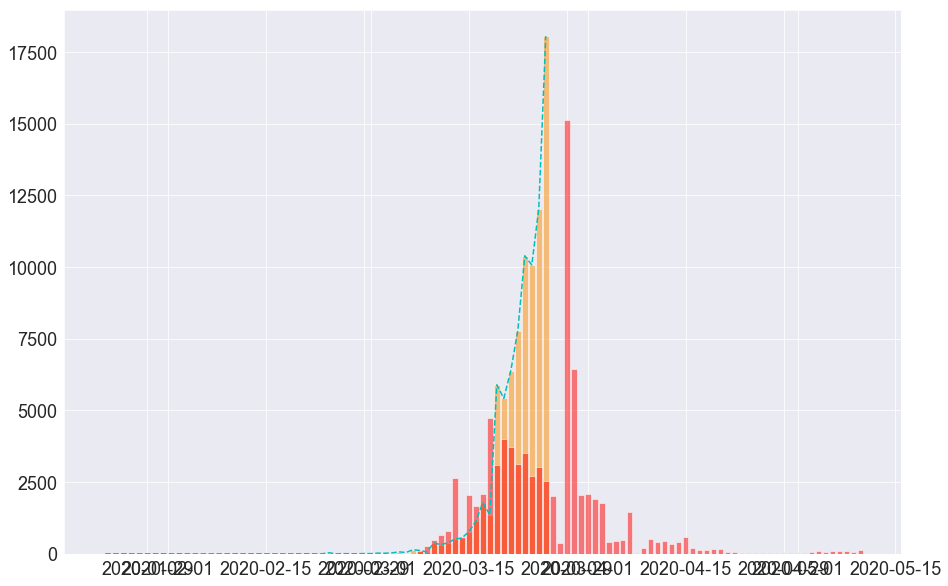

In [637]:
plt.plot(us_df['Record Date'], us_df.num_confirmed_that_day, 'c--')
plt.bar(us_df['Record Date'], us_df.num_confirmed_that_day, color='darkorange', alpha=0.5)
plt.bar(china_df['Record Date'], china_df.num_confirmed_that_day, color='r', alpha=0.5)

In [1358]:
def plot_country_df(_tmp_df, country):
    
    # plt.bar(_tmp_df.index, _tmp_df.num_confirmed_that_day)
    plt.plot(_tmp_df.index, _tmp_df.num_confirmed_that_day, 'c--')
    plt.bar(_tmp_df.index, _tmp_df.num_confirmed_that_day, color='darkorange', alpha=0.8)
    # plt.bar(china_df['Record Date'], china_df.num_confirmed_that_day, color='r', alpha=0.8)

    ax = plt.gca()

    ax.set_xticks(ax.get_xticks()[::3])
    ax.get_yaxis().set_major_formatter(
        matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

    plt.xticks(rotation=45)
    plt.ylabel("Daily Number of Confirmed Infections")
    plt.xlabel("Timeline") 
    plt.title("Daily COVID-19 Confirmed Cases and Deaths in %s" % country )
    plt.show()



    plt.bar(_tmp_df.index, _tmp_df.num_death_that_day, color='red', alpha=0.6)
    # plt.bar(china_df.index, china_df.num_death_that_day, color='g', alpha=0.6)
    plt.plot(_tmp_df.index, _tmp_df.num_death_that_day, 'r--')

    ax = plt.gca()

    ax.set_xticks(ax.get_xticks()[::3])
    plt.xticks(rotation=45)
    ax.get_yaxis().set_major_formatter(
        matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))


    plt.ylabel("Daily Number of Deaths")
    plt.xlabel("Timeline") 

    plt.annotate('Source: 2019 Novel Coronavirus COVID-19 (2019-nCoV) Data Repository by Johns Hopkins CSSE', (0,0),
                 (0, -120), xycoords='axes fraction',
                 textcoords='offset points', va='top', fontsize=16)


    ax = plt.gca()
    ax.get_yaxis().set_major_formatter(
        matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

    plt.show()

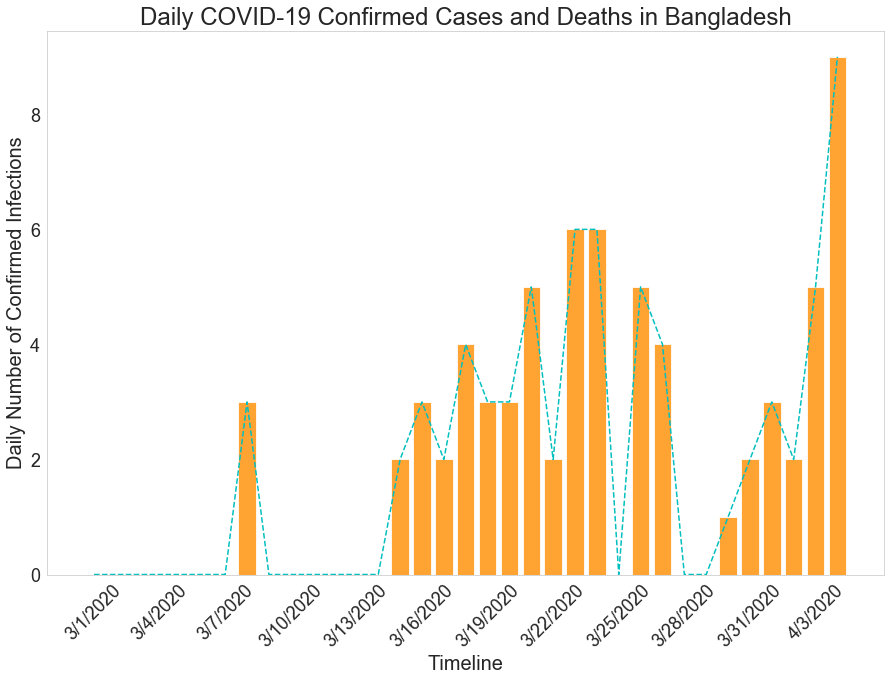

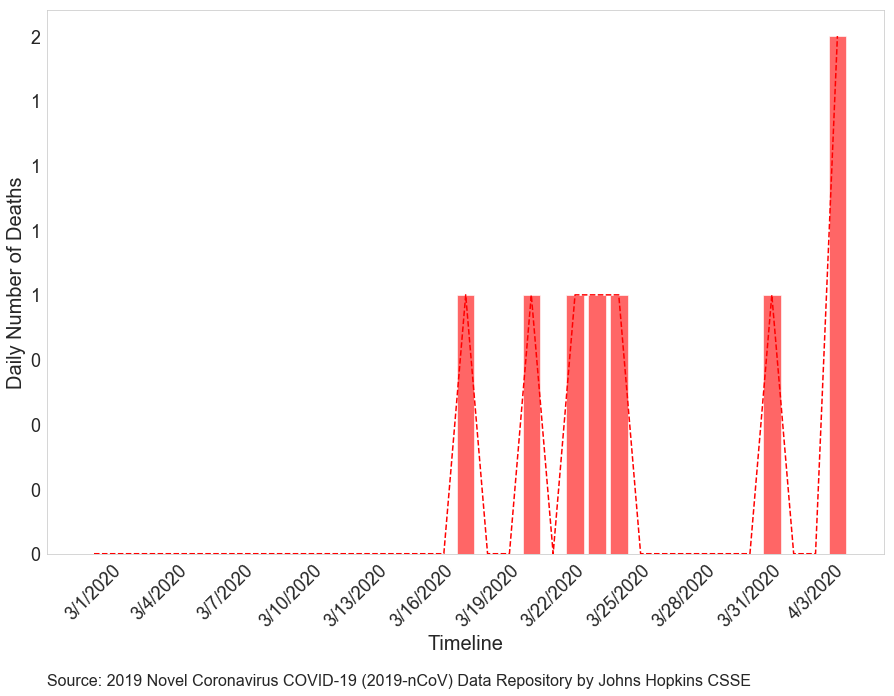

In [1412]:
sns.despine()
plot_country_df(Bangladesh_df.iloc[39:], "Bangladesh")


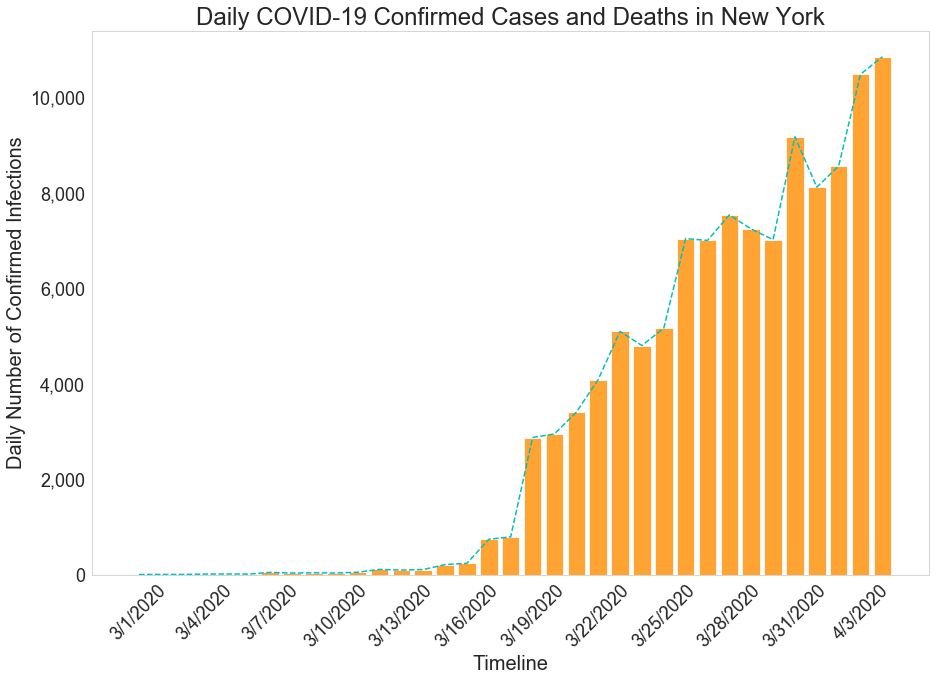

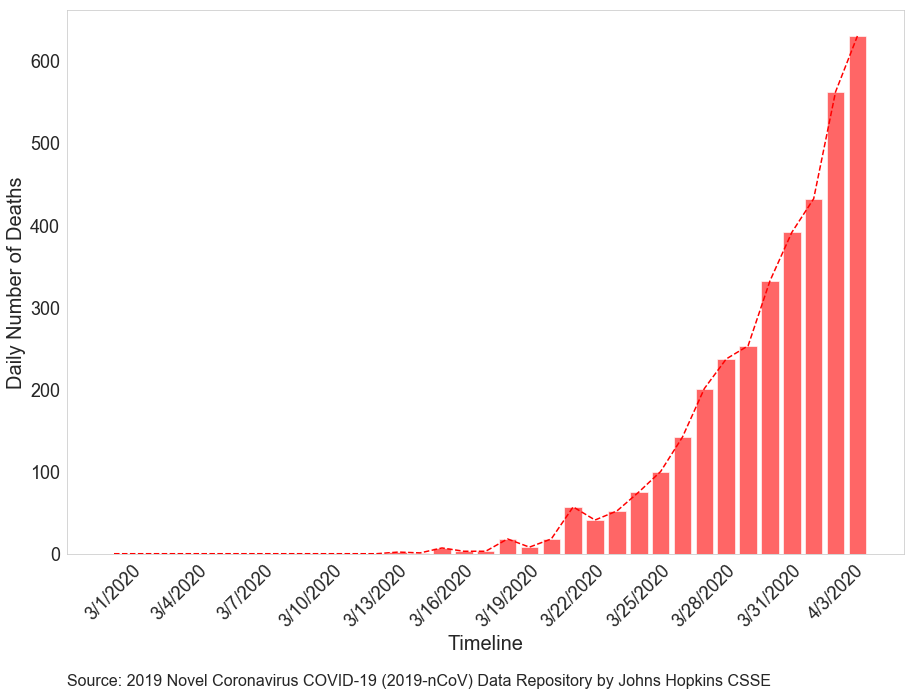

In [1362]:
plot_country_df(ny_df.iloc[39:], "New York")

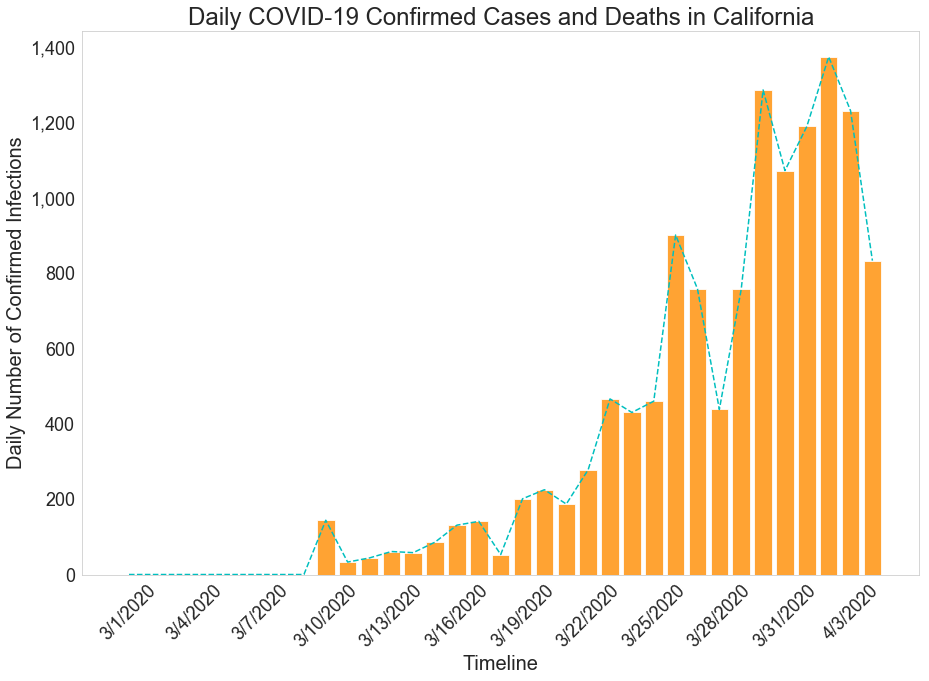

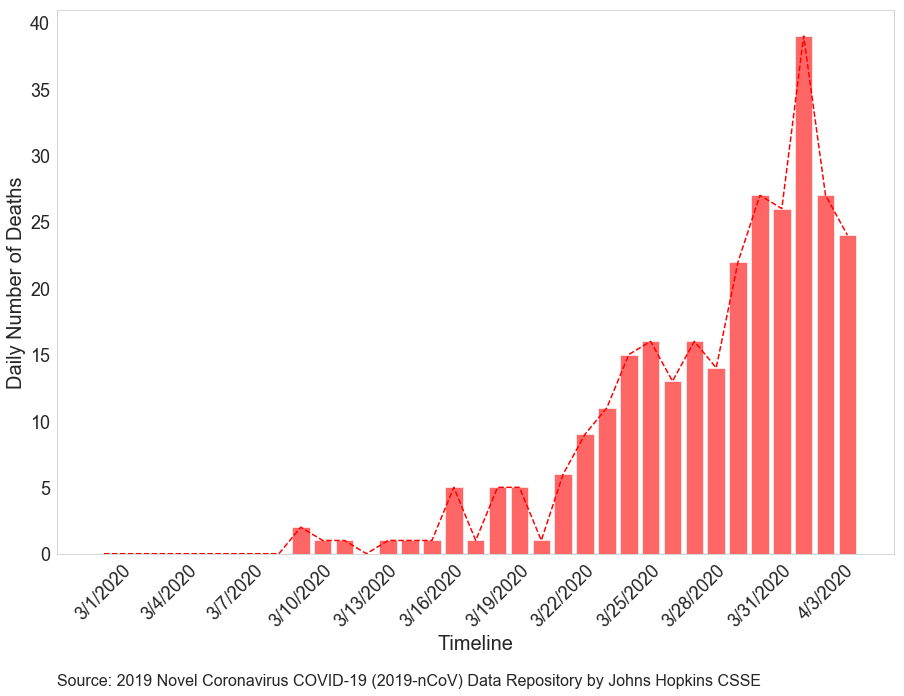

In [1363]:
plot_country_df(ca_df.iloc[39:], "California")

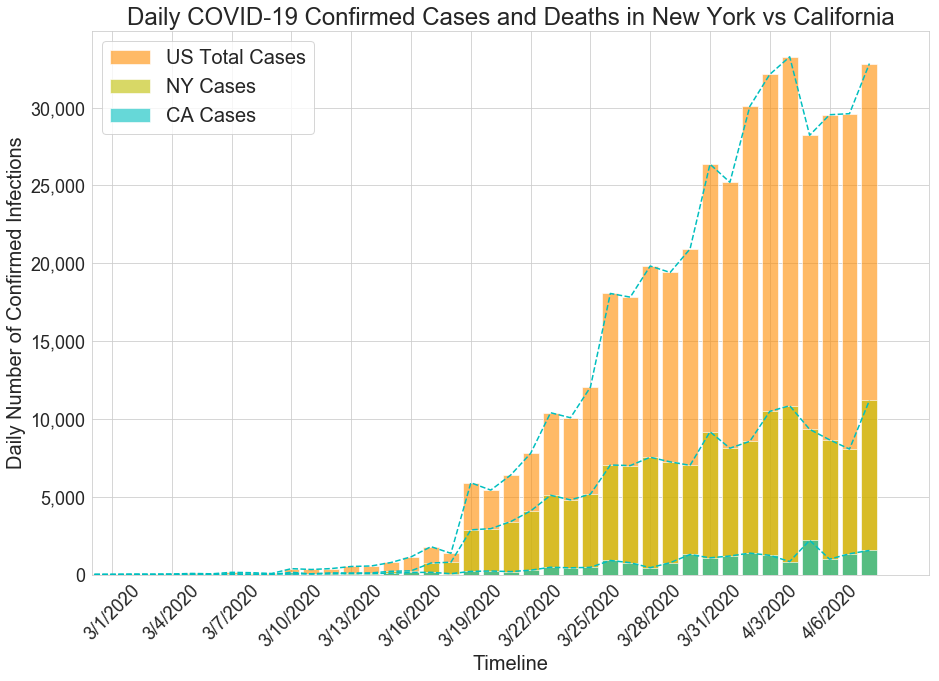

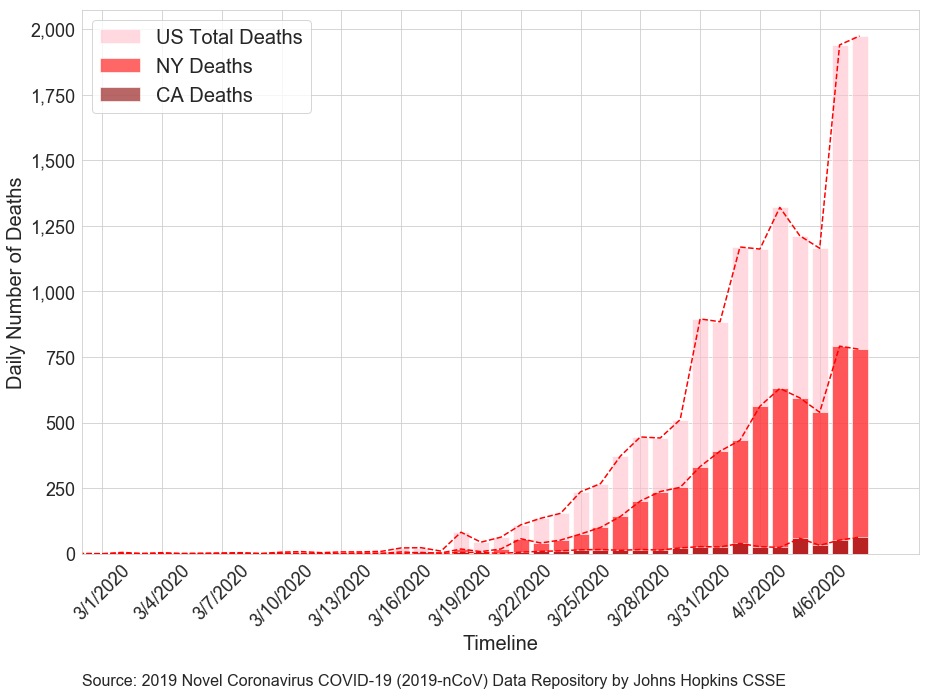

In [1665]:
# plt.bar(ny_df.index, ny_df.num_confirmed_that_day)
plt.plot(us_df.index, us_df.num_confirmed_that_day.values, 'c--')
plt.bar(us_df.index, us_df.num_confirmed_that_day, color='darkorange', alpha=0.6, label="US Total Cases")

plt.plot(ny_df.index, ny_df.num_confirmed_that_day.values, 'c--')
plt.bar(ny_df.index, ny_df.num_confirmed_that_day, color='y', alpha=0.6, label="NY Cases")

plt.plot(ca_df.index, ca_df.num_confirmed_that_day.values, 'c--')
plt.bar(ca_df.index, ca_df.num_confirmed_that_day, color='c', alpha=0.6, label="CA Cases")
# plt.bar(china_df['Record Date'], china_df.num_confirmed_that_day, color='r', alpha=0.8)   

ax = plt.gca()

ax.set_xticks(ax.get_xticks()[::3])
ax.get_yaxis().set_major_formatter(
    matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

plt.xticks(rotation=45)
plt.ylabel("Daily Number of Confirmed Infections")
plt.xlabel("Timeline") 
plt.title("Daily COVID-19 Confirmed Cases and Deaths in %s" % "New York vs California" )
plt.legend()
plt.xlim(38,80)
plt.show()

plt.bar(us_df.index, us_df.num_death_that_day, color='pink', alpha=0.6, label="US Total Deaths")
plt.plot(us_df.index, us_df.num_death_that_day.values, 'r--')

plt.bar(ny_df.index, ny_df.num_death_that_day, color='red', alpha=0.6, label="NY Deaths")
plt.plot(ny_df.index, ny_df.num_death_that_day.values, 'r--')

plt.bar(ca_df.index, ca_df.num_death_that_day, color='darkred', alpha=0.6,label="CA Deaths")
plt.plot(ca_df.index, ca_df.num_death_that_day.values, 'r--')


ax = plt.gca()

ax.set_xticks(ax.get_xticks()[::3])
plt.xticks(rotation=45)
ax.get_yaxis().set_major_formatter(
    matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))


plt.ylabel("Daily Number of Deaths")
plt.xlabel("Timeline") 

plt.annotate('Source: 2019 Novel Coronavirus COVID-19 (2019-nCoV) Data Repository by Johns Hopkins CSSE', (0,0),
             (0, -120), xycoords='axes fraction',
             textcoords='offset points', va='top', fontsize=16)


ax = plt.gca()
ax.get_yaxis().set_major_formatter(
    matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
plt.xlim(38,80)
plt.legend()
plt.show()

plt.bar(us_df.index, us_df.num_death_that_day, color='red', alpha=0.6)
plt.plot(us_df.num_death_that_day, 'r--')

ax = plt.gca()

ax.set_xticks(ax.get_xticks()[::7])
plt.xticks(rotation=45)

In [1404]:
us_df.iloc[-4:].sum()

num_confirmed             1041261.0
num_death                   26177.0
num_recovered               41834.0
num_confirmed_that_day     120678.0
num_death_that_day           4534.0
num_recovered_that_day       7628.0
dtype: float64

In [274]:
s0=10.

In [278]:
%%time
for i in range(100000):
    S = s0 - np.concatenate(([0], np.cumsum(S)[:-1]))

CPU times: user 557 ms, sys: 26.9 ms, total: 584 ms
Wall time: 560 ms


In [283]:
%%time
for i in range(100000):
    S = s0 - np.cumsum(S)[:-1]

CPU times: user 309 ms, sys: 1.18 ms, total: 310 ms
Wall time: 309 ms


In [302]:
# S = np.ones(65, dtype=np.int)
offset = 1
print(S)
S[-offset:] = np.cumsum(S[-offset:])
S[-offset - 1] = 0
S[0] += S[-1]
print(S)
S[:-offset] = np.cumsum(S[:-offset])
print(S)

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64  0]
[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63  0  0]
[   1    3    6   10   15   21   28   36   45   55   66   78   91  105
  120  136  153  171  190  210  231  253  276  300  325  351  378  406
  435  465  496  528  561  595  630  666  703  741  780  820  861  903
  946  990 1035 1081 1128 1176 1225 1275 1326 1378 1431 1485 1540 1596
 1653 1711 1770 1830 1891 1953 2016 2016    0]


In [299]:
S

array([1.000e+00, 3.000e+00, 6.000e+00, 1.000e+01, 1.500e+01, 2.100e+01,
       2.800e+01, 3.600e+01, 4.500e+01, 5.500e+01, 6.600e+01, 7.800e+01,
       9.100e+01, 1.050e+02, 1.200e+02, 1.360e+02, 1.530e+02, 1.710e+02,
       1.900e+02, 2.100e+02, 2.310e+02, 2.530e+02, 2.760e+02, 3.000e+02,
       3.250e+02, 3.510e+02, 3.780e+02, 4.060e+02, 4.350e+02, 4.650e+02,
       4.960e+02, 5.280e+02, 5.610e+02, 5.950e+02, 6.300e+02, 6.660e+02,
       7.030e+02, 7.410e+02, 7.800e+02, 8.200e+02, 8.610e+02, 9.030e+02,
       9.460e+02, 9.900e+02, 1.035e+03, 1.081e+03, 1.128e+03, 1.176e+03,
       1.225e+03, 1.275e+03, 1.326e+03, 1.378e+03, 1.431e+03, 1.485e+03,
       1.540e+03, 1.596e+03, 1.653e+03, 1.711e+03, 1.770e+03, 1.830e+03,
       1.891e+03, 1.953e+03, 2.016e+03, 2.016e+03, 0.000e+00])

In [ ]:
def cumsum_w_offset(arr, offset=0):
    arr[-offset:] = np.cumsum(arr[-offset:])
    
    offset += 1
    
    return arr, offset
    
    

In [641]:
np.log(164.7e6)

18.91963619514787

In [ ]:
http://gabgoh.github.io/COVID/index.html?CFR=0.0115144&D_hospital_lag=5&D_incbation=5.2&D_infectious=2.9&D_recovery_mild=11.1&D_recovery_severe=28.6&I0=1&InterventionAmt=0.33&InterventionTime=91&P_SEVERE=0.12&R0=2.4&Time_to_death=32&logN=19.605471

In [411]:
np.linspace(.1, 1, 10)

array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ])

(0, 60)

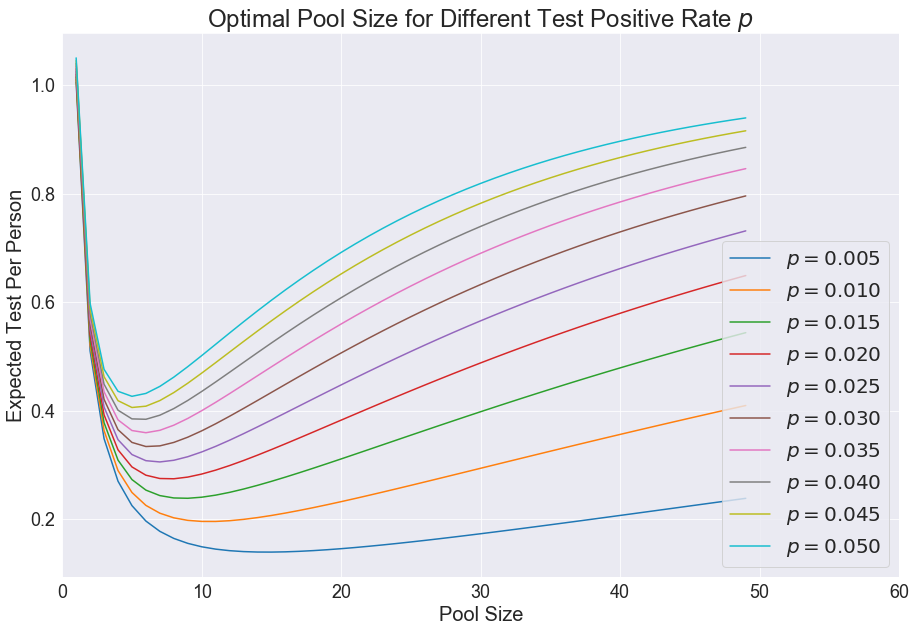

In [1338]:
# positive_rate = 0.5

for positive_rate in np.linspace(.005, .05, 10):
    X = np.arange(1, 50)
    P_success = (1 - positive_rate) ** X 
    P_fail = 1 - P_success

    plt.plot(X, (1 * P_success + (1 + X) * P_fail) / X, label="$p = %.3f$" % positive_rate)

plt.xlabel("Pool Size")
plt.ylabel("Expected Test Per Person")
plt.title("Optimal Pool Size for Different Test Positive Rate $p$")

plt.legend()
plt.xlim(0,60)

In [366]:
def expected_value(x):
    p = (1 - positive_rate) ** x
    
    return 0 * x + p * (1 + x)

In [435]:
import camelot

In [497]:
import camelot

tables = camelot.read_pdf('HealthBulletin2017Final13_01_2018.pdf', pages='320-330')

bed_df = pd.concat([t.df.iloc[1:] for t in tables]).iloc[:-9]
bed_df.columns = tables[0].df.iloc[0]
bed_df.to_csv("upazila_heatlh_complex_bd_bed_stats.csv")

In [863]:
import pyreadr

result = pyreadr.read_r('/Users/tarik/Dropbox/SEIR/covid_DurInf3.rdata')

In [864]:
result

OrderedDict()

In [1150]:
### day, total cases, total_dead, hospitalization at peak
projection_data = [[75, 227.596, 1.636, 5.343], [90, 1695.9, 12.19, 40.7], [105, 10936.5, 78.7, 291.3], [130, 87020.627, 626.475, 3661.82], 
                   [365, 144704.7, 1041.7, 5714.8]]

projection_data = [[75, 227.596, 1.636, 5.343], [90, 1695.9, 12.19, 40.7], [130, 87020.627, 626.475, 3661.82], 
                   [365, 144704.7, 1041.7, 5714.8]]
# projection_data = zip(projection_data)

In [1151]:
proj_df = pd.DataFrame(projection_data, columns=["day", "total_case", "total_dead", "hospital_peak"])

In [1152]:
proj_df["icu_peak"] = proj_df.hospital_peak / 12.

In [1153]:
# proj_df["meta"] = ["Early Intervention\n(April 15)", "Mid 1 Intervention\n(April 30)", "Mid 2 Intervention\n(May 15)",
#                    "Late Intervention\n(June 10)", "No Intervention"]
proj_df["meta"] = ["Early Intervention\n(April 15)", "Mid Intervention\n(April 30)", 
                   "Late Intervention\n(June 10)", "No Intervention"]

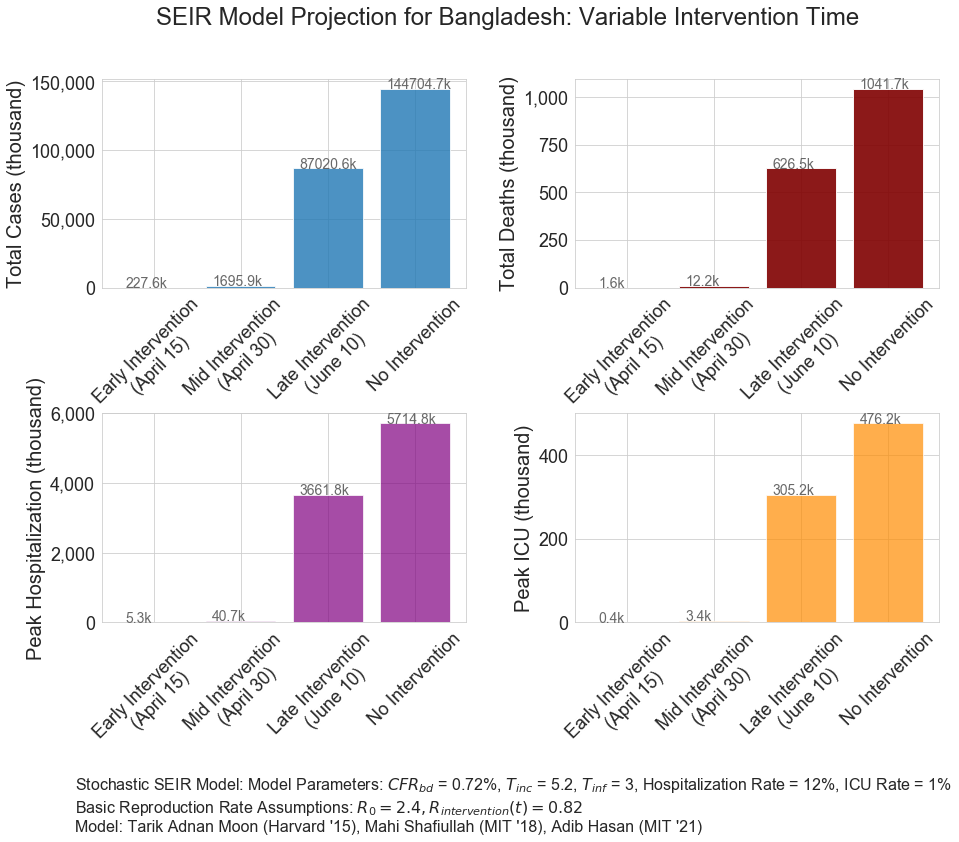

In [1699]:
def prettify_xytick(_plt):
    _plt.ticklabel_format(style='plain', axis='y')
    _plt.xticks(rotation=45)
    ax = _plt.gca()
    ax.get_yaxis().set_major_formatter(
        matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
    
    # create a list to collect the plt.patches data
    totals = []

    
    for i in ax.patches:
        # get_x pulls left or right; get_height pushes up or down
        ax.text(i.get_x() + .075, i.get_height(), \
                str(round(i.get_height(), 1)) + 'k', fontsize=14,
                    color='dimgrey')
    _plt.xticks(rotation=45)
    return _plt

# plt.bar(proj_df.meta, proj_df.hospital_peak * 1000.)
# plt.yscale('log')

plt.subplot(221)
plt.bar(proj_df.meta, proj_df.total_case, alpha=0.8)

plt = prettify_xytick(plt)
plt.ylabel("Total Cases (thousand)")
# 2x2, second axis
plt.subplot(222)
plt.bar(proj_df.meta, proj_df.total_dead, color='maroon', alpha=0.9)
plt = prettify_xytick(plt)
plt.ylabel("Total Deaths (thousand)")
# # 2x2, third axis

plt.subplot(223)
plt.bar(proj_df.meta, proj_df.hospital_peak, color='purple', alpha=.7)
plt = prettify_xytick(plt)
plt.ylabel("Peak Hospitalization (thousand)")
# # 2x2, fourth axis
plt.subplot(224)
plt.bar(proj_df.meta, proj_df.icu_peak, color='darkorange', alpha=0.7)
plt = prettify_xytick(plt)
plt.ylabel("Peak ICU (thousand)")
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=.3, hspace=.6)

plt.suptitle("SEIR Model Projection for Bangladesh: Variable Intervention Time", size=24)

s = """Stochastic SEIR Model: Model Parameters: $CFR_{bd}$ = 0.72%, $T_{inc}$ = 5.2, $T_{inf}$ = 3, Hospitalization Rate = 12%, ICU Rate = 1%
Basic Reproduction Rate Assumptions: $R_0 = 2.4, R_{intervention} (t) =0.82$
Model: Tarik Adnan Moon (Harvard '15), Mahi Shafiullah (MIT '18), Adib Hasan (MIT '21) """
plt.annotate(s, (0,0),
             (-500, -150), xycoords='axes fraction',
             textcoords='offset points', va='top', fontsize=16)

plt.savefig('exports/seir_model.png', dpi=160)

plt.show()

In [1088]:
ny_df

num_confirmed  num_death  num_recovered  num_confirmed_that_day  num_death_that_day  num_recovered_that_day
1/22/2020              0          0              0                     NaN                 NaN                     NaN
1/23/2020              0          0              0                     0.0                 0.0                     0.0
1/24/2020              0          0              0                     0.0                 0.0                     0.0
1/25/2020              0          0              0                     0.0                 0.0                     0.0
1/26/2020              0          0              0                     0.0                 0.0                     0.0
1/27/2020              0          0              0                     0.0                 0.0                     0.0
1/28/2020              0          0              0                     0.0                 0.0                     0.0
1/29/2020              0          0              0                     0.0                 0.0                     0.0
1/30/2020              0          0              0                     0.0                 0.0                     0.0
1/31/2020              0          0              0                     0.0                 0.0                     0.0
2/1/2020               0          0              0                     0.0                 0.0                     0.0
2/2/2020               0          0              0                     0.0                 0.0                     0.0
2/3/2020               0          0              0                     0.0                 0.0                     0.0
2/4/2020               0          0              0                     0.0                 0.0                     0.0
2/5/2020               0          0              0                     0.0                 0.0                     0.0
2/6/2020               0          0              0                     0.0                 0.0                     0.0
2/7/2020               0          0              0                     0.0                 0.0                     0.0
2/8/2020               0          0              0                     0.0                 0.0                     0.0
2/9/2020               0          0              0                     0.0                 0.0                     0.0
2/10/2020              0          0              0                     0.0                 0.0                     0.0
2/11/2020              0          0              0                     0.0                 0.0                     0.0
2/12/2020              0          0              0                     0.0                 0.0                     0.0
2/13/2020              0          0              0                     0.0                 0.0                     0.0
2/14/2020              0          0              0                     0.0                 0.0                     0.0
2/15/2020              0          0              0                     0.0                 0.0                     0.0
2/16/2020              0          0              0                     0.0                 0.0                     0.0
2/17/2020              0          0              0                     0.0                 0.0                     0.0
2/18/2020              0          0              0                     0.0                 0.0                     0.0
2/19/2020              0          0              0                     0.0                 0.0                     0.0
2/20/2020              0          0              0                     0.0                 0.0                     0.0
2/21/2020              0          0              0                     0.0                 0.0                     0.0
2/22/2020              0          0              0                     0.0                 0.0                     0.0
2/23/2020              0          0              0                     0.0          

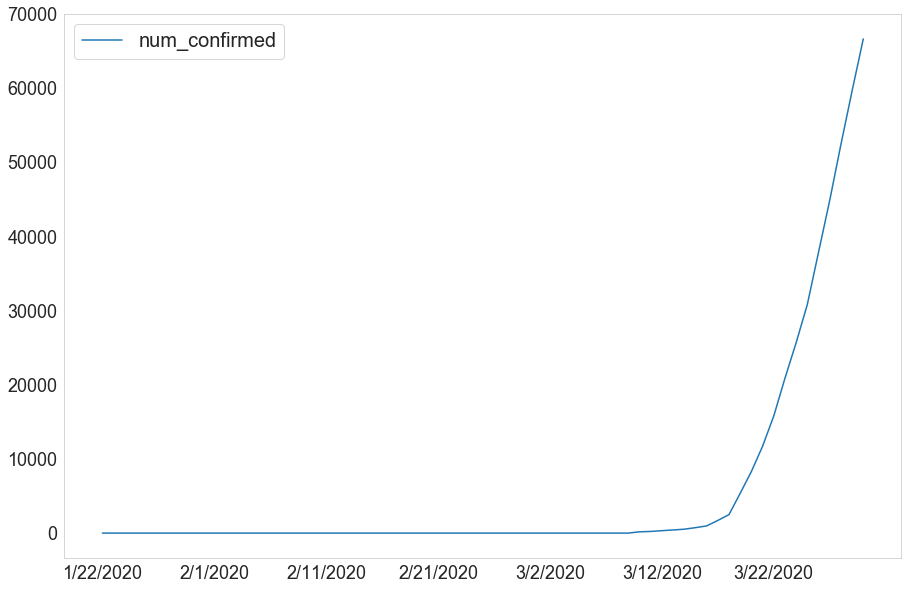

In [1087]:
ny_df.plot(y = ["num_confirmed"])

In [1094]:
tmp_df[tmp_df.State.isin([" NY", "New York"])]["Province/State"].values

array(['Nassau County, NY', 'New York', 'New York County, NY',
       'Rockland County, NY', 'Saratoga County, NY', 'Suffolk County, NY',
       'Ulster County, NY', 'Westchester County, NY'], dtype=object)

(40, 69)

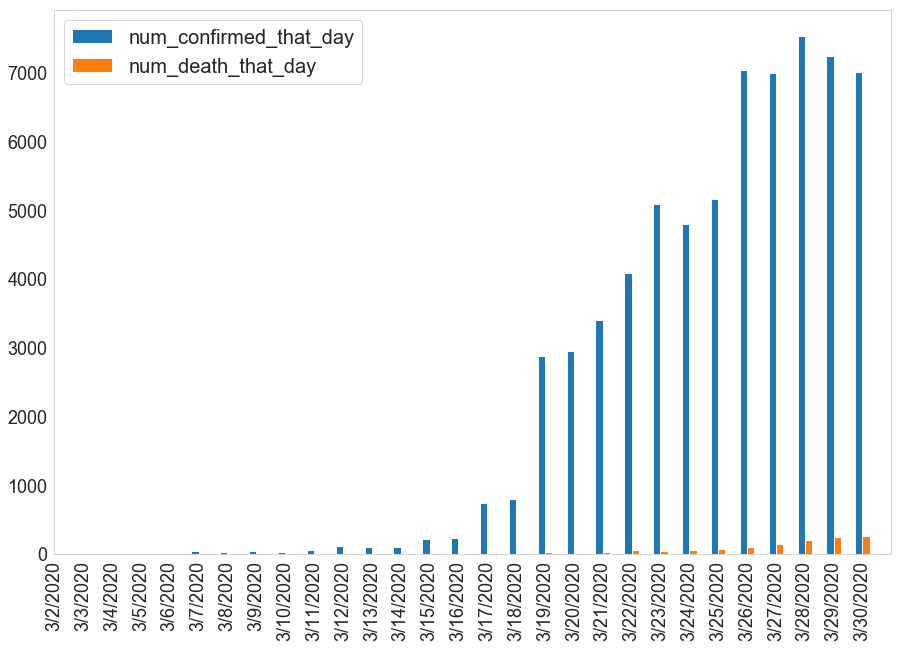

In [1108]:
ny_df.plot(y=["num_confirmed_that_day", "num_death_that_day"], kind="bar")
plt.xlim(40,69)

In [1211]:
toilet_df = pd.read_html("https://en.wikipedia.org/wiki/List_of_countries_by_proportion_of_the_population_using_improved_sanitation_facilities")[1]

In [1218]:
toilet_df.tail(10)

Country  2005 |  2006  2007  2008  2009  2010
161      United Kingdom     100   100   100   100   100   100
162       United States     100   100   100   100   100   100
163             Uruguay      99   100   100   100   100   100
164          Uzbekistan      97    98   100   100   100   100
165             Vanuatu      49    51    52    54    55    57
166  West Bank and Gaza      91    91    91    92    92    92
167             Vietnam      66    69    70    72    74    76
168               Yemen      47    49    50    52    52    53
169              Zambia      48    47    47    48    48    48
170            Zimbabwe      40    40    40    40    39    40

In [1284]:
cases_df = pd.merge(country_df.T[["4/2/20"]], toilet_df[["Country", "2010"]],
                    left_index=True, right_on="Country", how="left").rename(columns={"4/2/20":"num_cases",
                                                                                    "2010":"sanitation_index"})

cases_df2 = pd.merge(dfs2[["Country", "case_per_mil", "latest_count"]], toilet_df[["Country", "2010"]],
                    on="Country", how="left").rename(columns={"4/2/20":"num_cases",
                                                                                    "2010":"sanitation_index"})

Text(0, -60, 'Correlation: $r=0.57$ \nData Source: WHO/UNICEF Joint Monitoring Programme ( JMP ) for Water Supply, Sanitation and Hygiene')

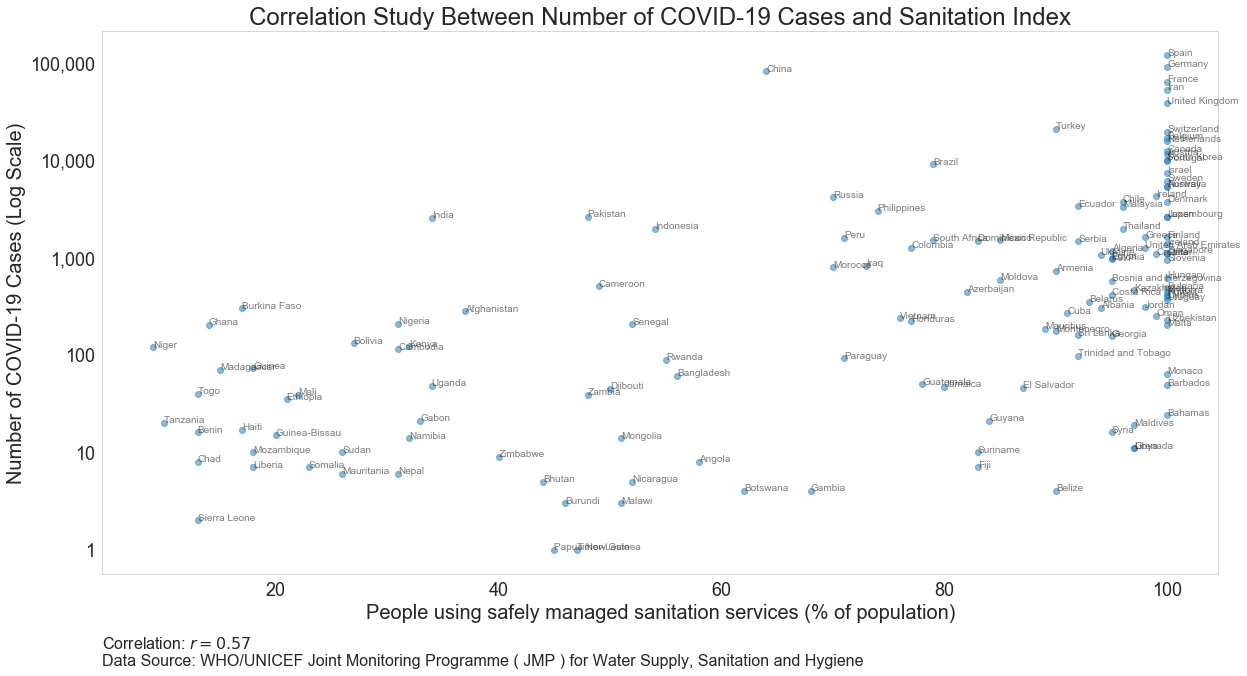

In [1276]:
mlp.rcParams['figure.figsize'] = 20, 10

plt.plot(cases_df.sanitation_index, cases_df.num_cases, 'o', alpha=0.5)

plt.ylabel("Number of COVID-19 Cases (Log Scale)")
plt.xlabel("People using safely managed sanitation services (% of population)")


plt.title("Correlation Study Between Number of COVID-19 Cases and Sanitation Index")

for  x, y, label in cases_df[["sanitation_index", "num_cases", "Country"]].dropna().values:
    plt.annotate(label, xy=(x, y), alpha=0.6)
    
plt.yscale('log')  
ax = plt.gca()

ax.get_yaxis().set_major_formatter(
    matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
    
plt.annotate('Correlation: $r=0.57$ \nData Source: WHO/UNICEF Joint Monitoring Programme ( JMP ) for Water Supply, Sanitation and Hygiene', (0,0),
             (0, -60), xycoords='axes fraction',
             textcoords='offset points', va='top', fontsize=16)

Text(0, -60, 'Correlation: $r=0.692$ \nData Source: WHO/UNICEF Joint Monitoring Programme ( JMP ) for Water Supply, Sanitation and Hygiene')

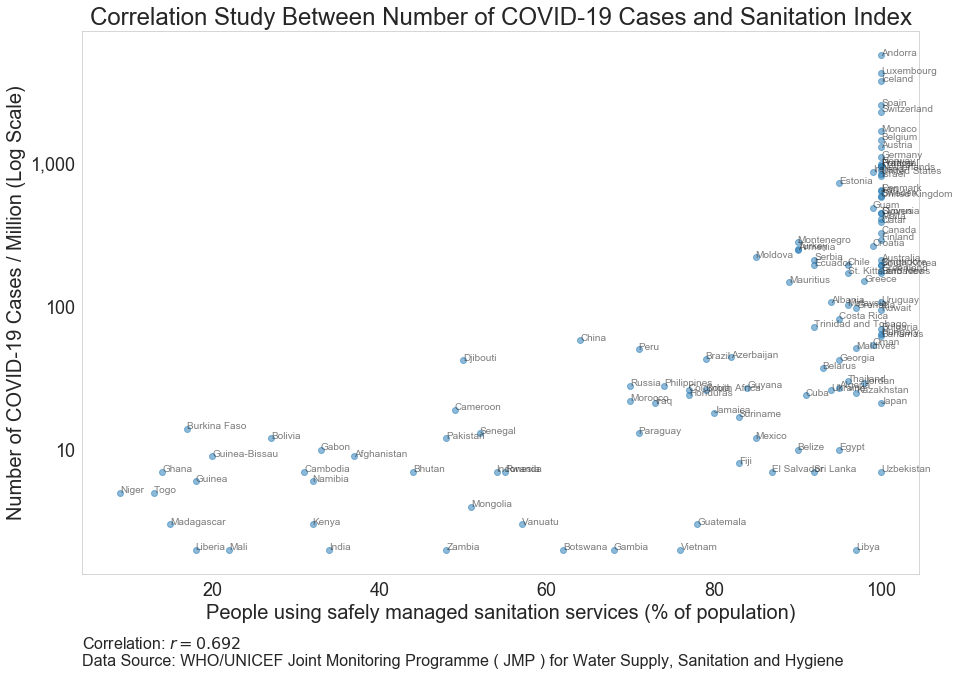

In [1301]:
mlp.rcParams['figure.figsize'] = 15, 10

plt.plot(cdf2.sanitation_index, cdf2.case_per_mil, 'o', alpha=0.5)

plt.ylabel("Number of COVID-19 Cases / Million (Log Scale)")
plt.xlabel("People using safely managed sanitation services (% of population)")


plt.title("Correlation Study Between Number of COVID-19 Cases and Sanitation Index")

for  x, y, label in cdf2[["sanitation_index", "case_per_mil", "Country"]].dropna().values:
    plt.annotate(label, xy=(x, y), alpha=0.6)
    
plt.yscale('log')  
ax = plt.gca()

ax.get_yaxis().set_major_formatter(
    matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
    
plt.annotate('Correlation: $r=0.692$ \nData Source: WHO/UNICEF Joint Monitoring Programme ( JMP ) for Water Supply, Sanitation and Hygiene', (0,0),
             (0, -60), xycoords='axes fraction',
             textcoords='offset points', va='top', fontsize=16)

In [1247]:
np.corrcoef(cases_df.dropna().sanitation_index, cases_df.dropna().num_cases.apply(np.log))

array([[1.        , 0.56722275],
       [0.56722275, 1.        ]])

In [1297]:
np.corrcoef(cdf2.sanitation_index, cdf2.case_per_mil.apply(np.log))

array([[1.        , 0.69165823],
       [0.69165823, 1.        ]])

In [1296]:
cdf2 = cases_df2[(cases_df2.case_per_mil > 1) & (cases_df2.sanitation_index > 0)]

In [1256]:
cases_df[["sanitation_index", "num_cases", "Country"]].values

array([[37.0, 281, 'Afghanistan'],
       [94.0, 304, 'Albania'],
       [95.0, 1171, 'Algeria'],
       [100.0, 439, 'Andorra'],
       [58.0, 8, 'Angola'],
       [nan, 1265, 'Argentina'],
       [90.0, 736, 'Armenia'],
       [100.0, 5375, 'Australia'],
       [100.0, 11523, 'Austria'],
       [82.0, 443, 'Azerbaijan'],
       [100.0, 24, 'Bahamas'],
       [nan, 672, 'Bahrain'],
       [56.0, 61, 'Bangladesh'],
       [100.0, 49, 'Barbados'],
       [93.0, 351, 'Belarus'],
       [100.0, 16770, 'Belgium'],
       [90.0, 4, 'Belize'],
       [13.0, 16, 'Benin'],
       [44.0, 5, 'Bhutan'],
       [27.0, 132, 'Bolivia'],
       [95.0, 579, 'Bosnia and Herzegovina'],
       [62.0, 4, 'Botswana'],
       [79.0, 9104, 'Brazil'],
       [nan, 134, 'Brunei'],
       [100.0, 485, 'Bulgaria'],
       [17.0, 302, 'Burkina Faso'],
       [46.0, 3, 'Burundi'],
       [nan, 6, 'Cabo Verde'],
       [31.0, 114, 'Cambodia'],
       [49.0, 509, 'Cameroon'],
       [100.0, 12426, 'Canada'],
       

In [1282]:
dfs2 = dfs = pd.read_html(driver.page_source)[0].rename(columns={'Cases  Total': "latest_count", 
    'Cases  Per Cap': 'case_per_mil'})
dfs2.head()

Country  HealthScore  latest_count Cases  24 Hrs  case_per_mil  Deaths  Total Deaths  24 Hrs  Recovered  Total Recovered  24 Hrs  Active  Total Active  24 Hrs  Unnamed: 11
0  United States          3.0        276964       +32,304         841.0         7385.0         +1,339           12283.0            +1,880         257296        +29,085          NaN
1          Italy          4.0        119827        +4,585        1989.0        14681.0           +766           19758.0            +1,480          85388         +2,339          NaN
2          Spain          4.0        119199        +7,134        2531.0        11198.0           +850           30513.0            +3,770          77488         +2,514          NaN
3        Germany          3.0         91559        +6,365        1101.0         1276.0           +168           13597.0            +2,135          76686         +4,062          NaN
4          China          9.0         81970           NaN          58.0         3324.0            +18           76666.0              +196           1980           -214          NaN

In [1281]:
dfs2.columns

Index(['Country', 'HealthScore', 'latest_count', 'Cases  24 Hrs', 'Cases  Per Cap', 'Deaths  Total', 'Deaths  24 Hrs', 'Recovered  Total', 'Recovered  24 Hrs', 'Active  Total', 'Active  24 Hrs', 'Unnamed: 11'], dtype='object')

In [1457]:
arr = np.array([2.56879735, 0.62376212, 1.03017914, 1.23621238, 1.39050634,
       1.53994874, 1.64940596, 1.66540145, 1.5204532 , 1.37046036,
       1.20825742, 1.05149257, 0.88854861, 0.76299776, 0.69602466,
       0.61751613, 0.53186204, 0.42998712, 0.36010042, 0.31255169,
       0.25001588, 0.1994626 , 0.15908064, 0.1301779 , 0.10947037,
       0.09673747, 0.08789109, 0.08143748, 0.0743038 , 0.06754357,
       0.06041958, 0.05481443, 0.05091677, 0.0482446 , 0.0465576 ,
       0.04462816]), np.array([5.68569536, 3.15498864, 3.14752745, 3.20607585, 3.33997012,
       3.53181354, 3.7042025 , 3.76922105, 3.49520659, 3.22438314,
       2.95679648, 2.69804545, 2.44202862, 2.21062886, 1.95990528,
       1.72808624, 1.50640894, 1.32371341, 1.15763509, 1.01425762,
       0.8947676 , 0.79023004, 0.69845798, 0.61688975, 0.54762682,
       0.48771825, 0.43612428, 0.39362947, 0.35592539, 0.32162716,
       0.29097926, 0.26367788, 0.24043271, 0.22026787, 0.20281132,
       0.18755347])

In [1513]:
date_arr = [str(datetime.date(2020,2,26) + datetime.timedelta(days=i)) for i in range(len(arr[0]))]

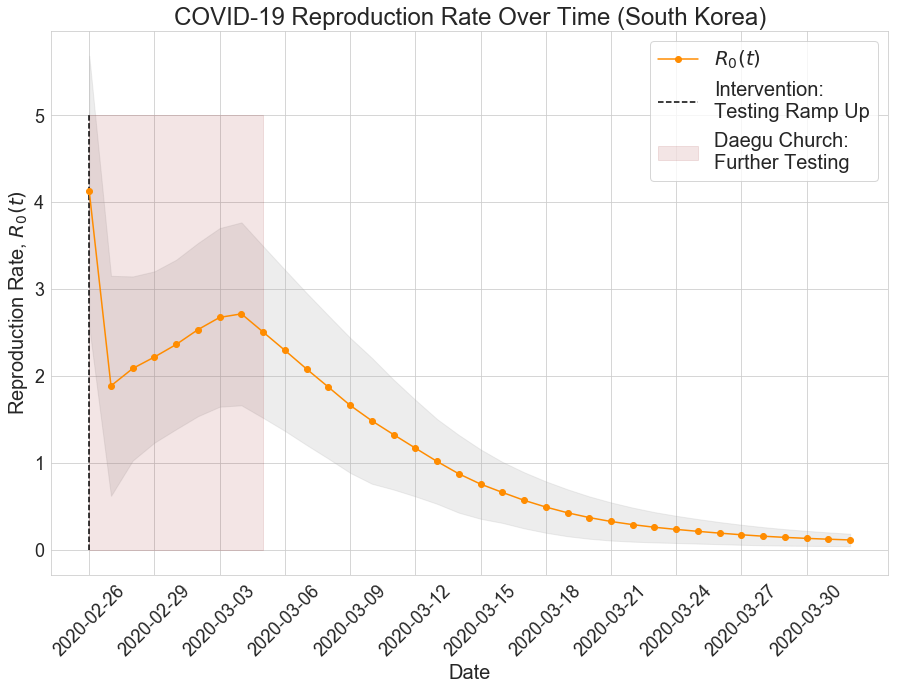

In [1531]:
plt.plot(date_arr, (arr[0] + arr[1]) / 2., 'o-', color='darkorange', label="$R_0(t)$")
# plt.plot(xfit, yfit, '-', color='gray')

plt.fill_between( date_arr, arr[0], arr[1], color='darkgrey', alpha=0.2)

ax = plt.gca()

ax.set_xticks(ax.get_xticks()[::3])
plt.xticks(rotation=45)
ax.get_yaxis().set_major_formatter(
    matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))


plt.xlabel("Date")
plt.ylabel("Reproduction Rate, $R_0(t)$")
plt.title("COVID-19 Reproduction Rate Over Time (South Korea)")
plt.vlines(0, 0, 5, linestyles='--', label="Intervention:\nTesting Ramp Up")
plt.fill_betweenx([0, 5], [0] * 2, [8] * 2, color='darkred', label="Daegu Church:\nFurther Testing", alpha=0.1)
plt.legend()